# 1. Data Exploration

In [1]:
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ANON_HIGH_RES_DATASET = "../data/Anonymized High Resolution Dataset (8 Days).csv"
COMB_DATA_SEG_RES_DATASET = "../data/Combined Data Segmentation Results (High Resolution Data of 8 Days).csv"

In [3]:
def plot_numerical_descriptives(x, y, title, fig_size=(18,6)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=fig_size)

    upper = y.mean() + 3.0 * y.std()
    lower = y.mean() - 3.0 * y.std()

    box_plt = y.plot(ax=axes[0], kind="box")
    box_plt.axhline(upper, color="r", linestyle="--")
    box_plt.axhline(lower, color="r", linestyle="--")
  
    line_plt = y.plot(y=x, ax=axes[1], kind="line")
    
    fig.suptitle(title, fontsize=16, fontweight="bold")

## 1.1 Import datasets

### 1.1.1 Load anonimized high resolution dataset

In [4]:
%%time
df_anon_high_res = pd.read_csv(ANON_HIGH_RES_DATASET, sep=';')

CPU times: user 759 ms, sys: 124 ms, total: 884 ms
Wall time: 887 ms


In [5]:
%%time
df_anon_high_res["TS"] = df_anon_high_res["TS"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

CPU times: user 9.46 s, sys: 30.9 ms, total: 9.49 s
Wall time: 9.49 s


### 1.1.2 Load combined data segmentation results dataset

In [6]:
%%time
df_comb_data_seg_res = pd.read_csv(COMB_DATA_SEG_RES_DATASET, sep=';')

CPU times: user 1.41 ms, sys: 4.19 ms, total: 5.6 ms
Wall time: 4.03 ms


## 1.2 Inspect datasets

### 1.2.1 Inspect anonimized high resolution dataset

In [7]:
df_anon_high_res.shape

(1416864, 5)

In [8]:
df_anon_high_res.dtypes

TS                datetime64[ns]
Tag                       object
Value                    float64
Sensor Type               object
Equipment Type            object
dtype: object

In [9]:
df_anon_high_res.isna().sum()

TS                    0
Tag                   0
Value             23044
Sensor Type           0
Equipment Type    57248
dtype: int64

In [10]:
df_anon_high_res.describe(include="all")

/tmp/ipykernel_38048/450524285.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_anon_high_res.describe(include="all")


TS       Tag         Value Sensor Type Equipment Type
count               1416864   1416864  1.393820e+06     1416864        1359616
unique               324960        69           NaN          10              4
top     2022-01-24 17:13:57  Sensor 3           NaN        Flow           Pump
freq                    157     86329           NaN      627991         558133
first   2022-01-24 00:00:04       NaN           NaN         NaN            NaN
last    2022-01-31 23:59:57       NaN           NaN         NaN            NaN
mean                    NaN       NaN  1.736666e+03         NaN            NaN
std                     NaN       NaN  7.715522e+03         NaN            NaN
min                     NaN       NaN -4.476077e+02         NaN            NaN
25%                     NaN       NaN  3.643715e+01         NaN            NaN
50%                     NaN       NaN  7.165440e+01         NaN            NaN
75%                     NaN       NaN  2.374709e+02         NaN            NaN
max                     NaN       NaN  1.020160e+05         NaN            NaN

In [11]:
df_anon_high_res.head(10)

TS       Tag  Value Sensor Type Equipment Type
0 2022-01-25 03:41:10  Sensor 1  222.0        Flow           Pump
1 2022-01-24 04:50:17  Sensor 1    0.0        Flow           Pump
2 2022-01-31 14:31:45  Sensor 1  106.0        Flow           Pump
3 2022-01-29 05:32:49  Sensor 1   87.0        Flow           Pump
4 2022-01-31 14:31:48  Sensor 1    0.0        Flow           Pump
5 2022-01-24 20:29:31  Sensor 1  251.0        Flow           Pump
6 2022-01-29 05:32:52  Sensor 1  387.0        Flow           Pump
7 2022-01-27 07:25:01  Sensor 1  399.0        Flow           Pump
8 2022-01-29 05:32:55  Sensor 1  474.0        Flow           Pump
9 2022-01-29 00:50:40  Sensor 1  477.0        Flow           Pump

### 1.2.2 Inspect combined data segmentation results dataset

In [12]:
# TODO(tomdewildt): inspect combined data segmentation results dataset

## 1.3 Clean data

### 1.3.1 Clean anonimized high resolution dataset¶

In [13]:
df_anon_high_res["TS"] = pd.to_datetime(df_anon_high_res["TS"])
df_anon_high_res["Tag"] = df_anon_high_res["Tag"].astype("category")
df_anon_high_res["Value"] = df_anon_high_res["Value"].astype("float")
df_anon_high_res["Sensor Type"] = df_anon_high_res["Sensor Type"].astype("category")
df_anon_high_res["Equipment Type"] = df_anon_high_res["Equipment Type"].astype("category")

### 1.3.2 Clean combined data segmentation results dataset

In [14]:
# TODO(tomdewildt): clean combined data segmentation results dataset

## 1.4 Explore data

### 1.4.1 Explore anonimized high resolution dataset

**Numerical values (per sensor)**

/tmp/ipykernel_38048/3683084472.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=fig_size)


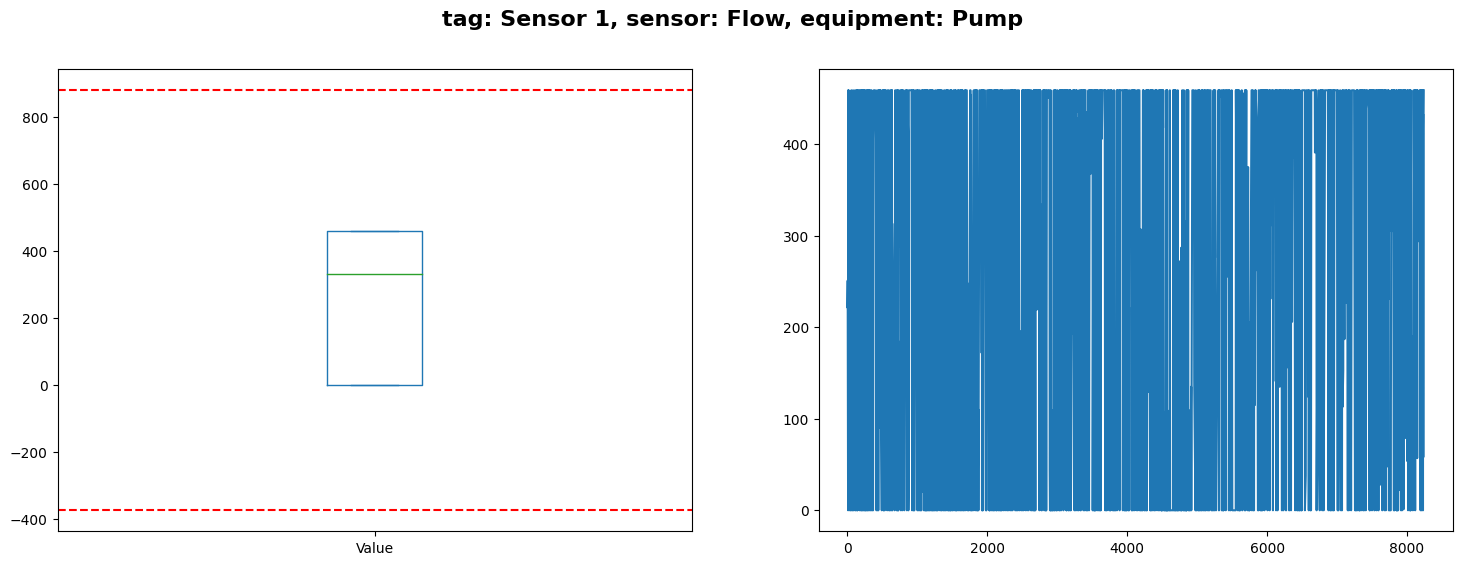

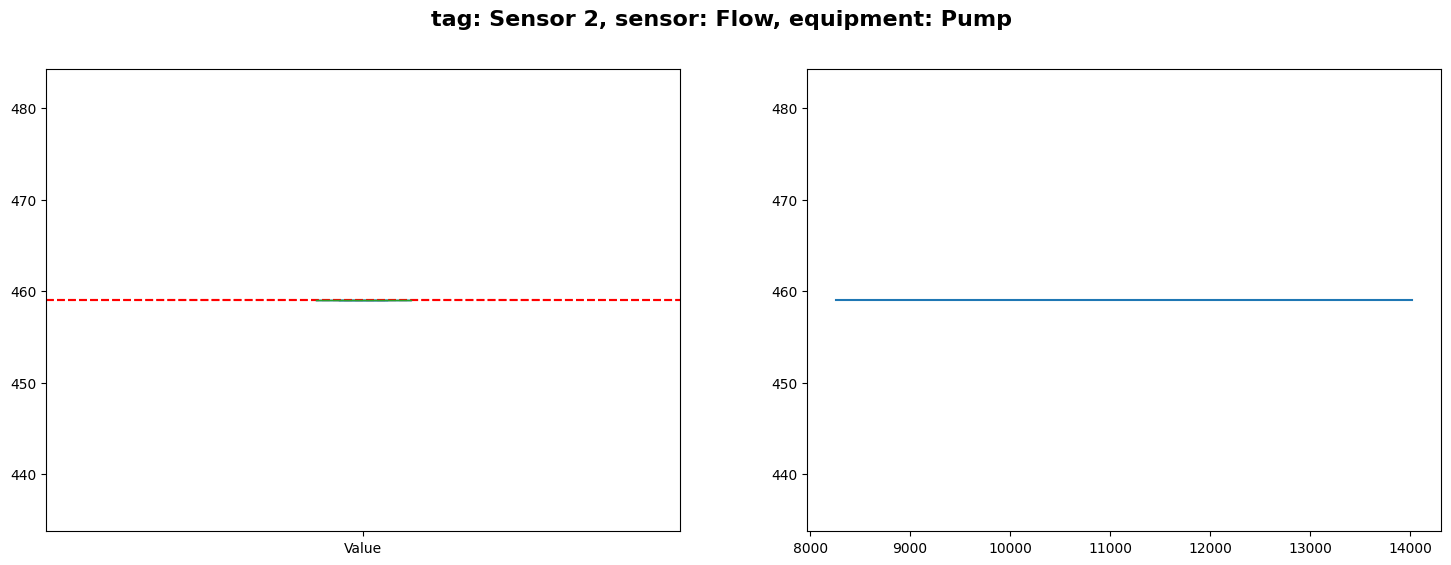

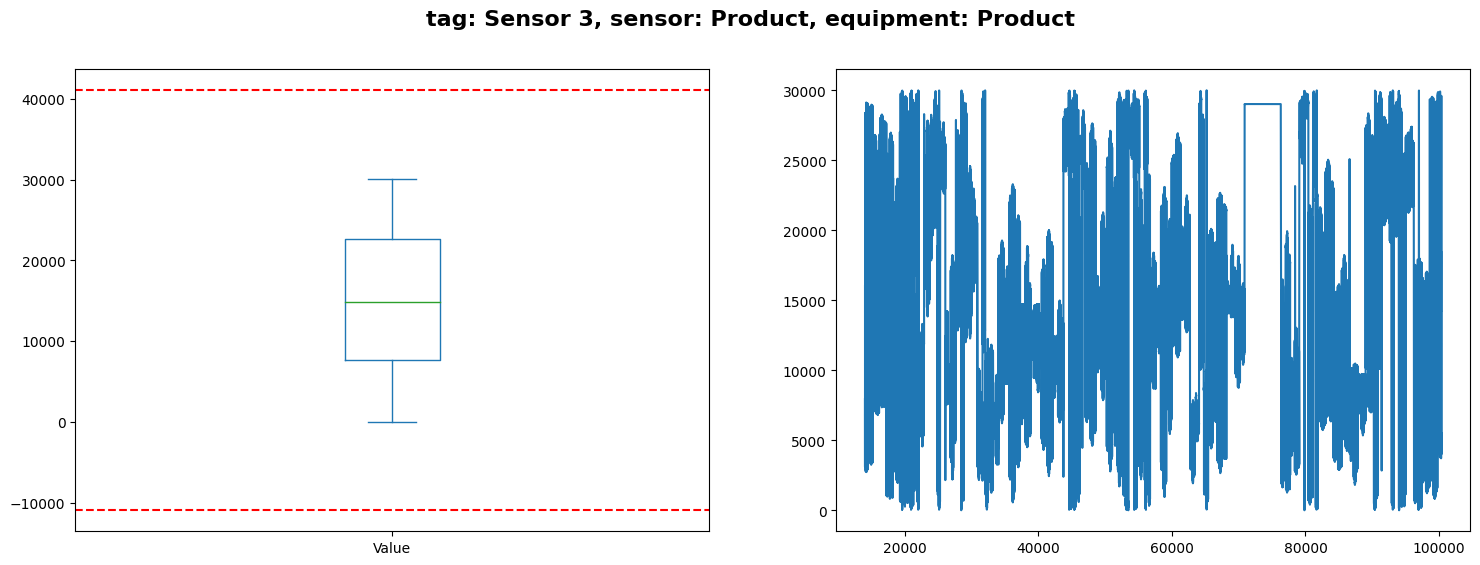

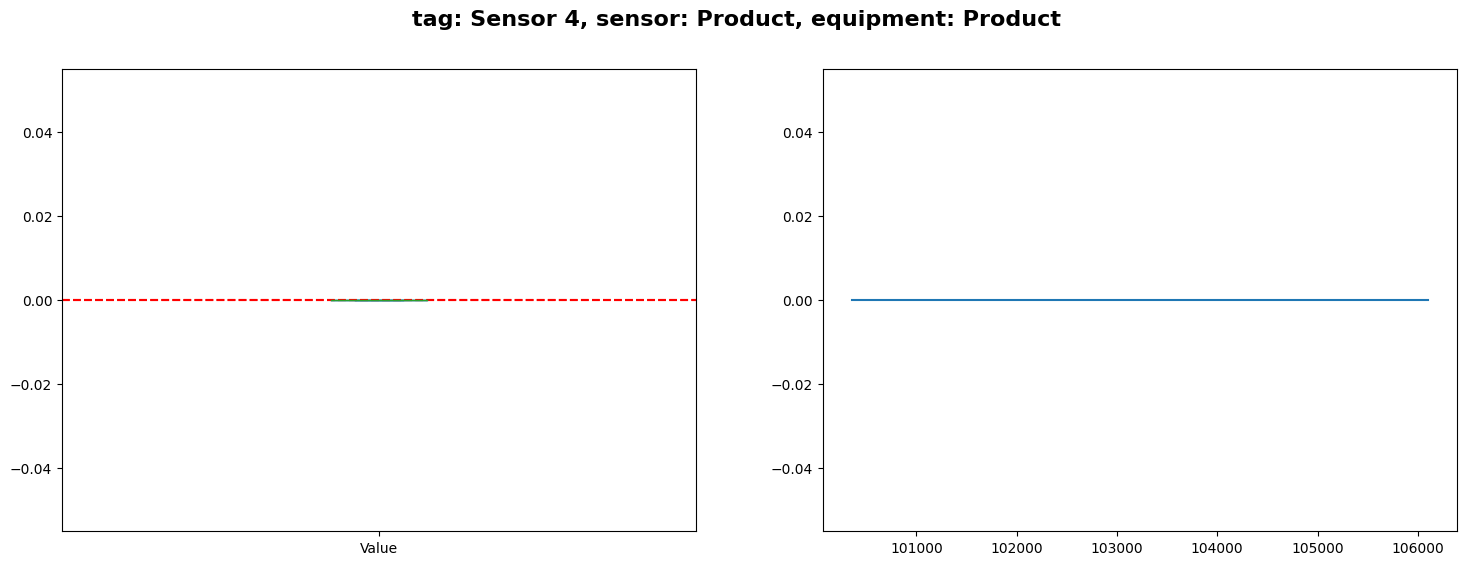

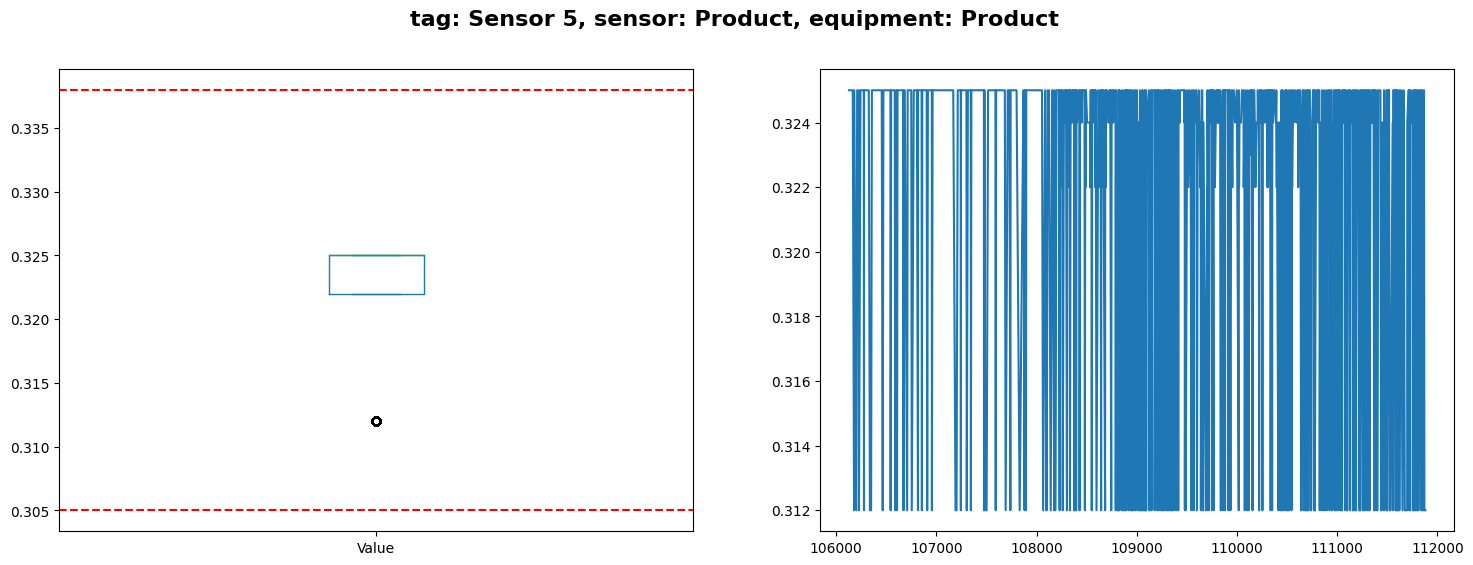

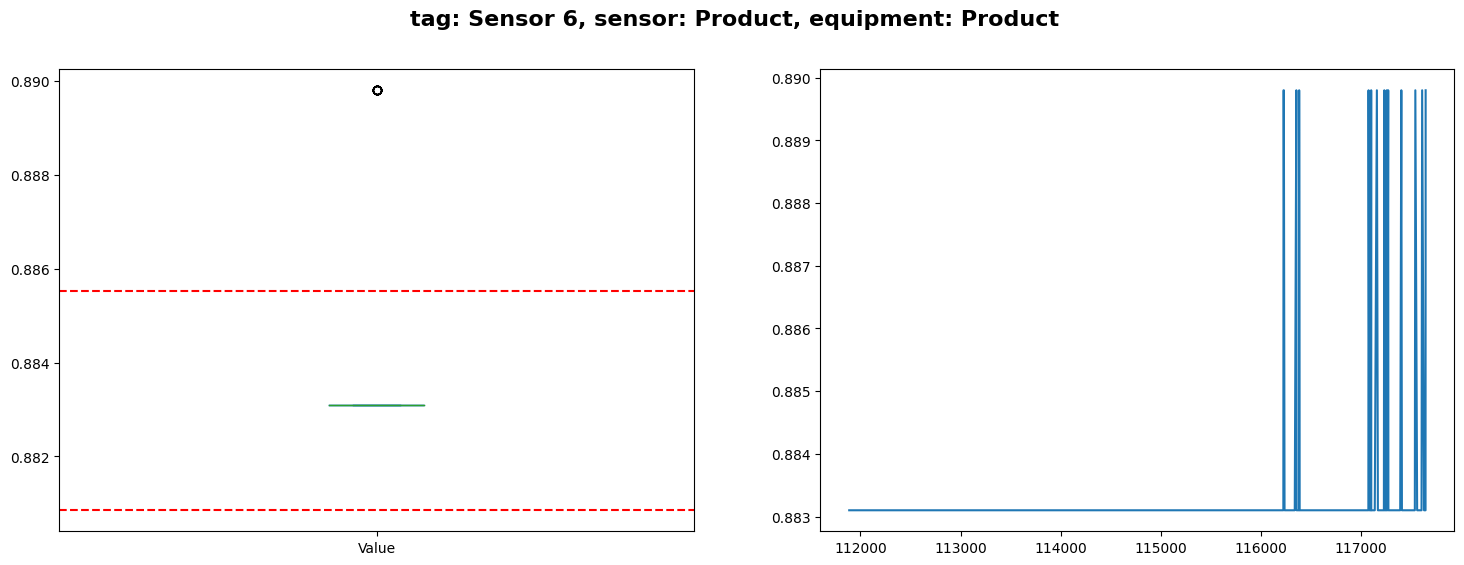

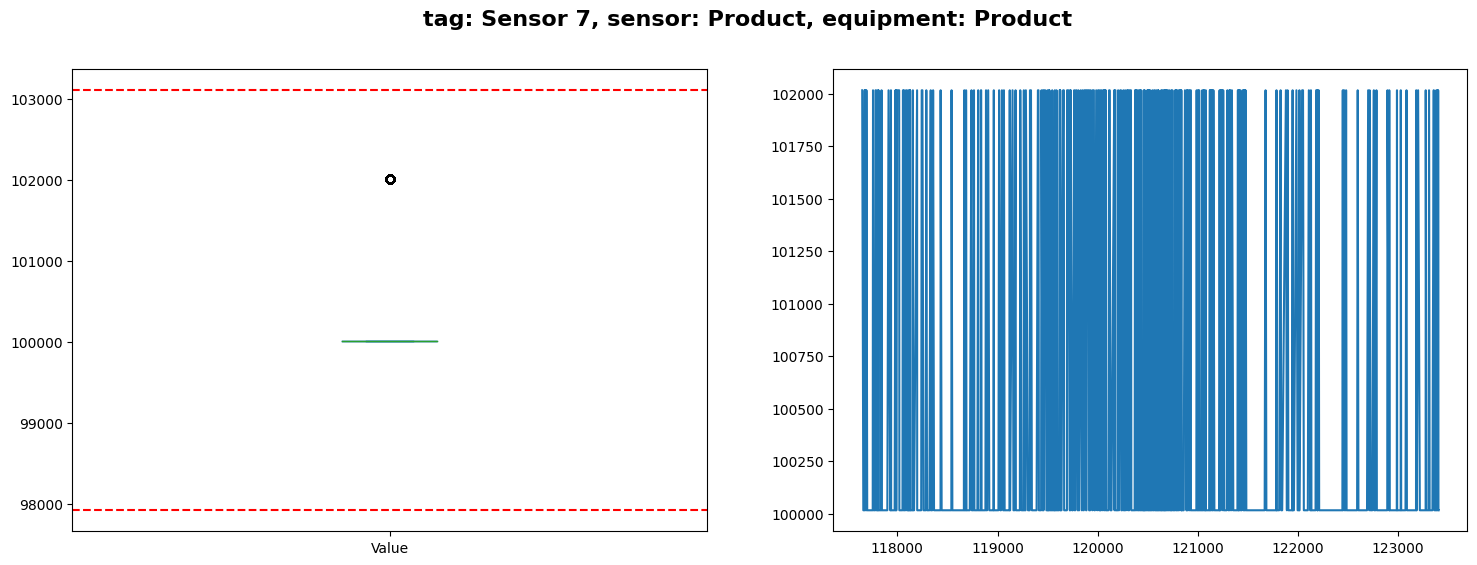

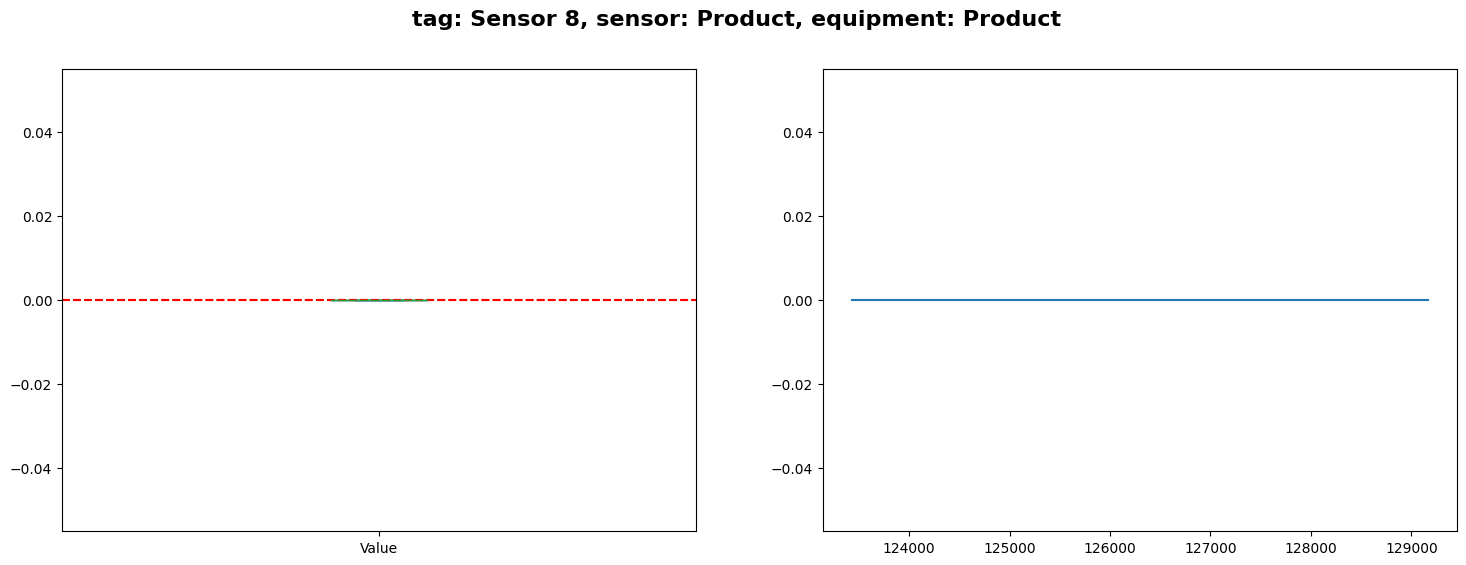

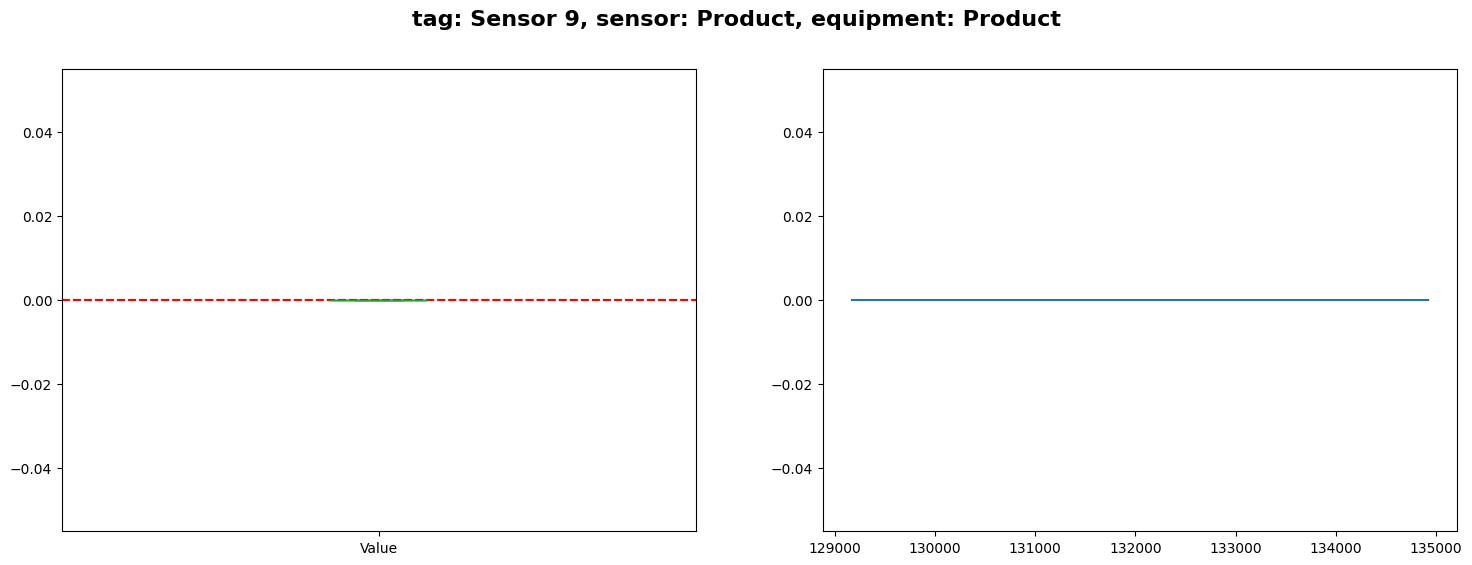

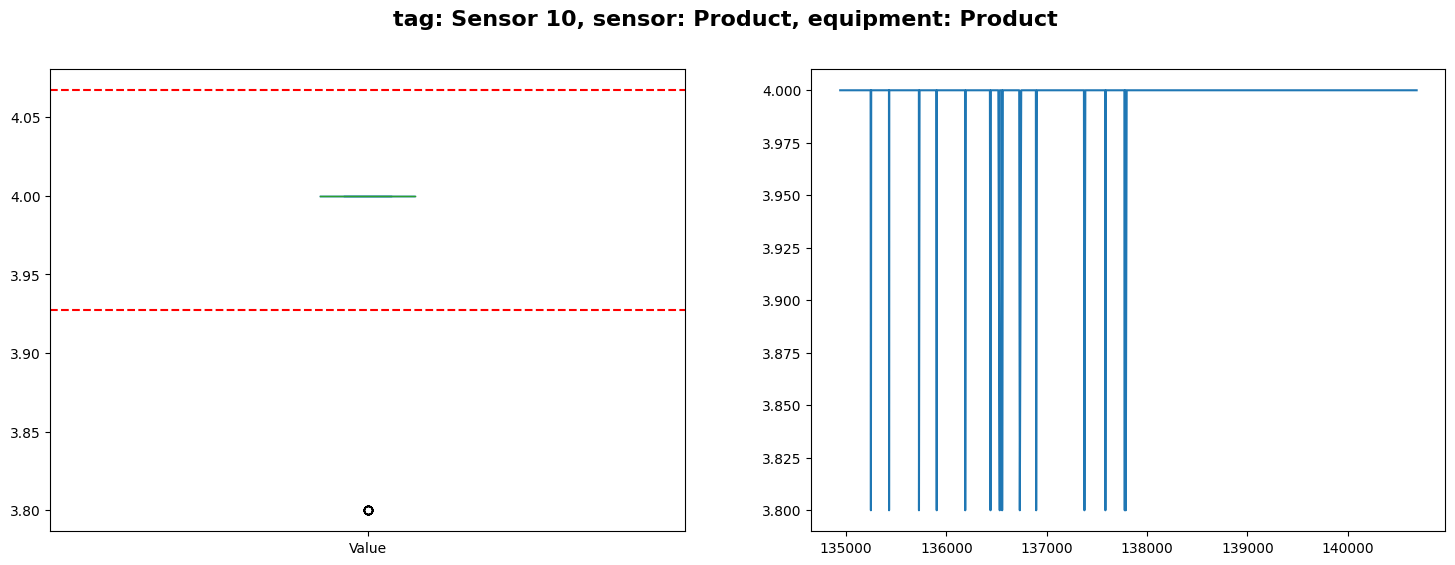

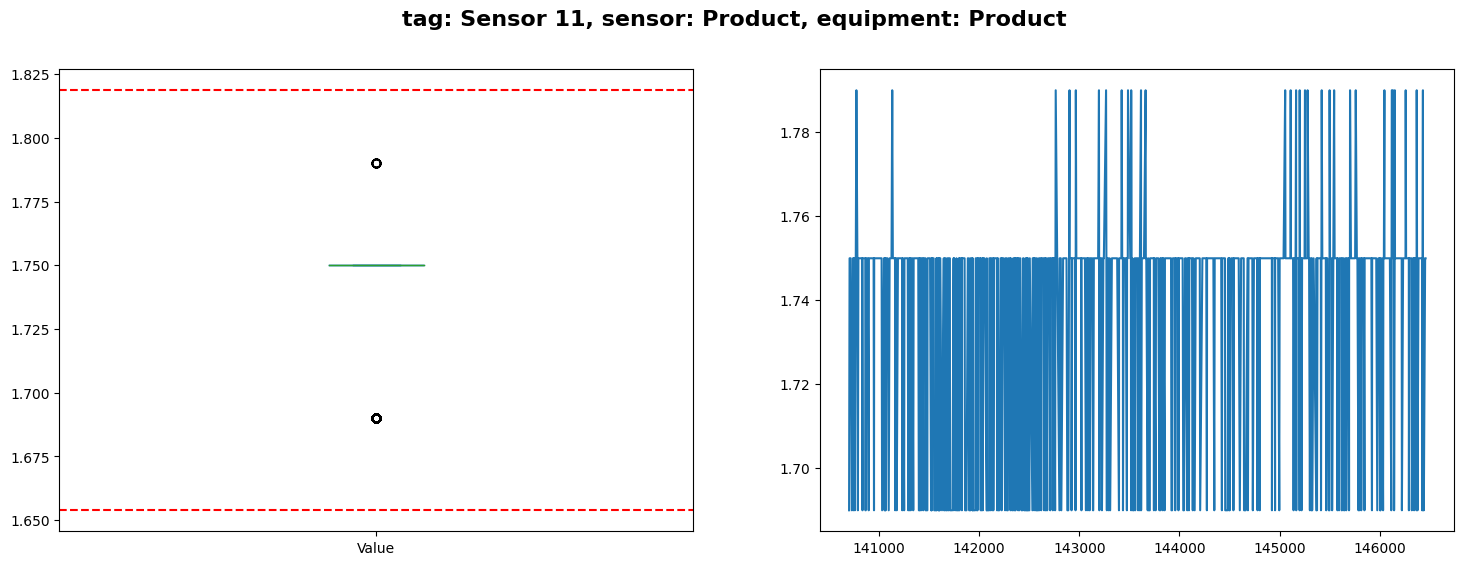

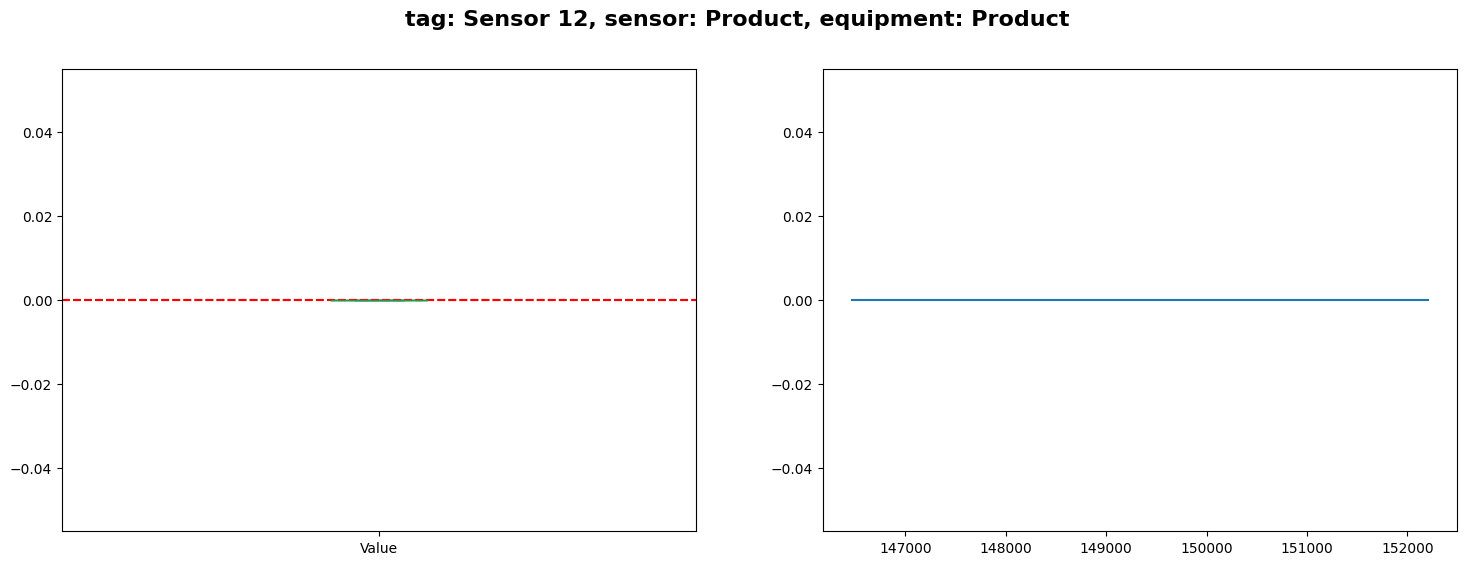

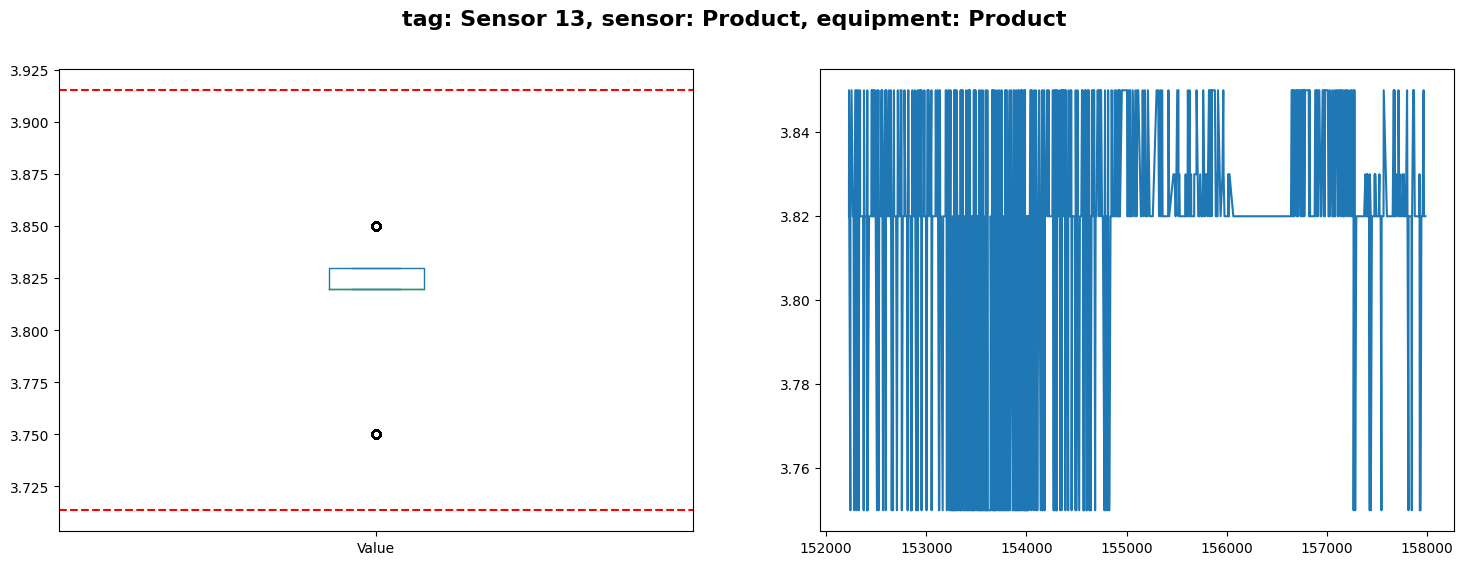

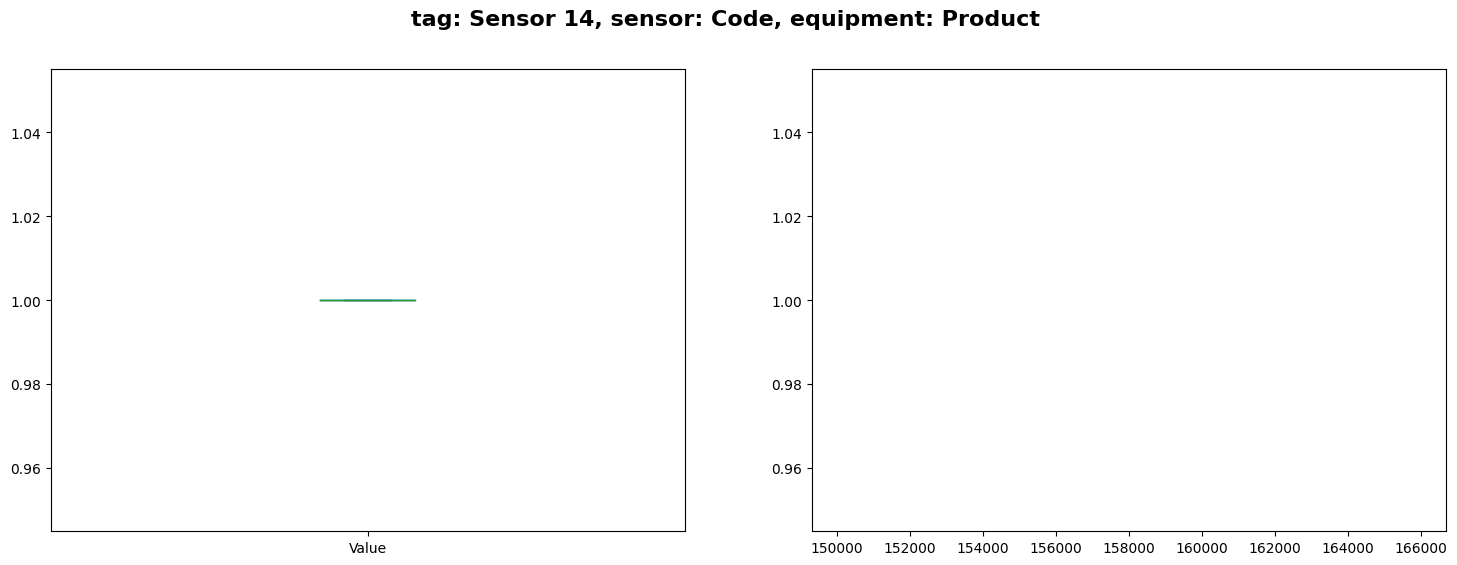

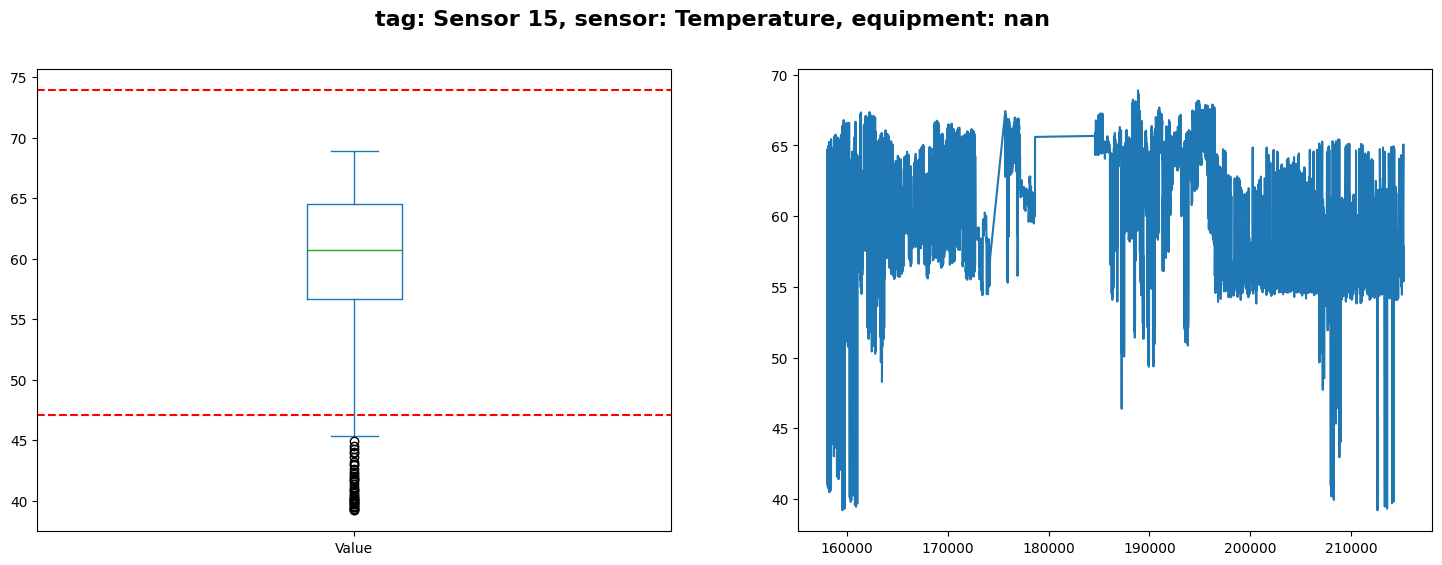

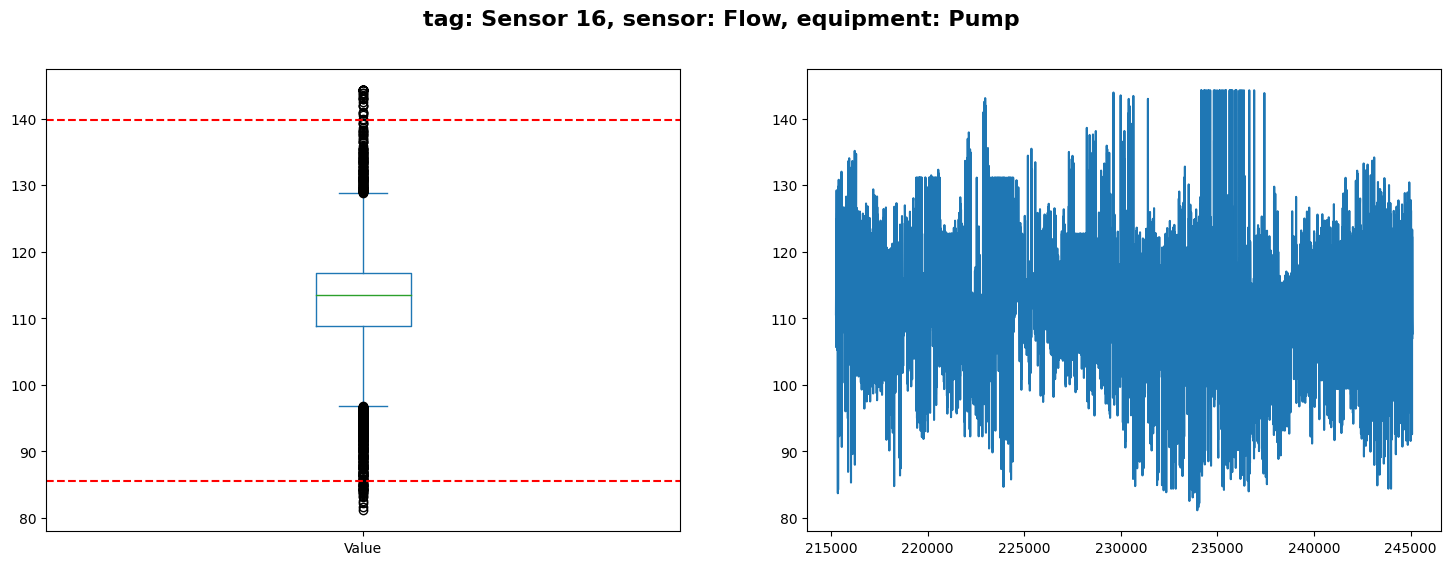

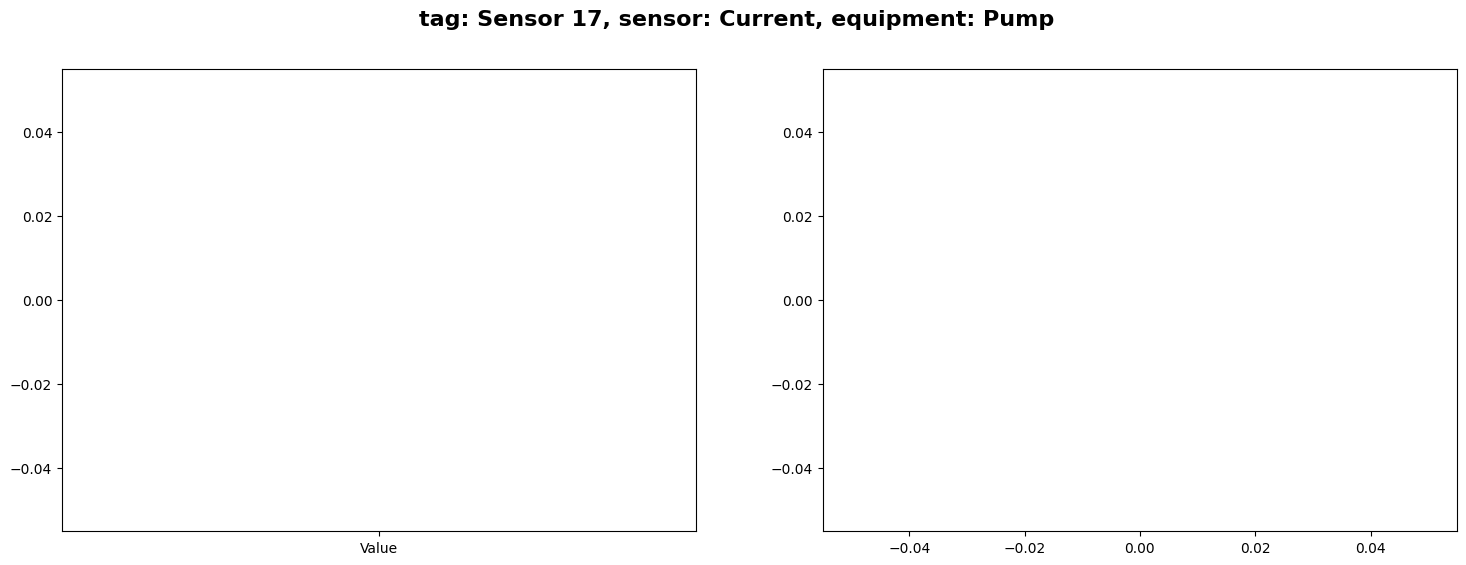

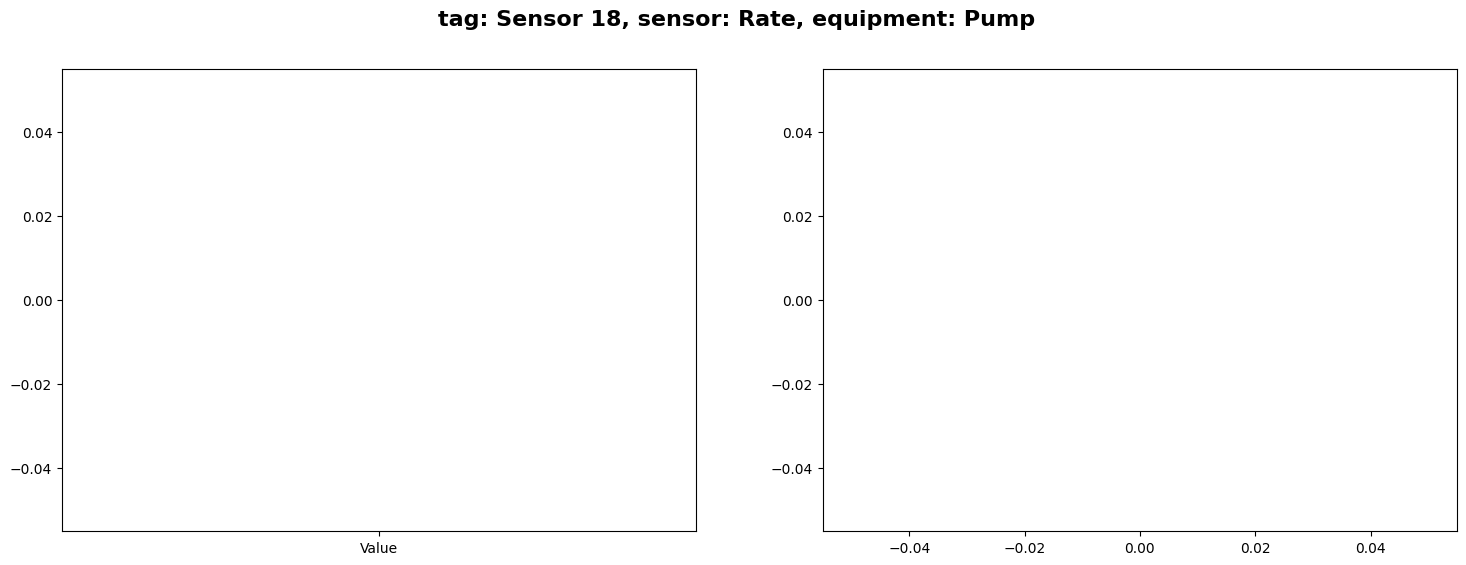

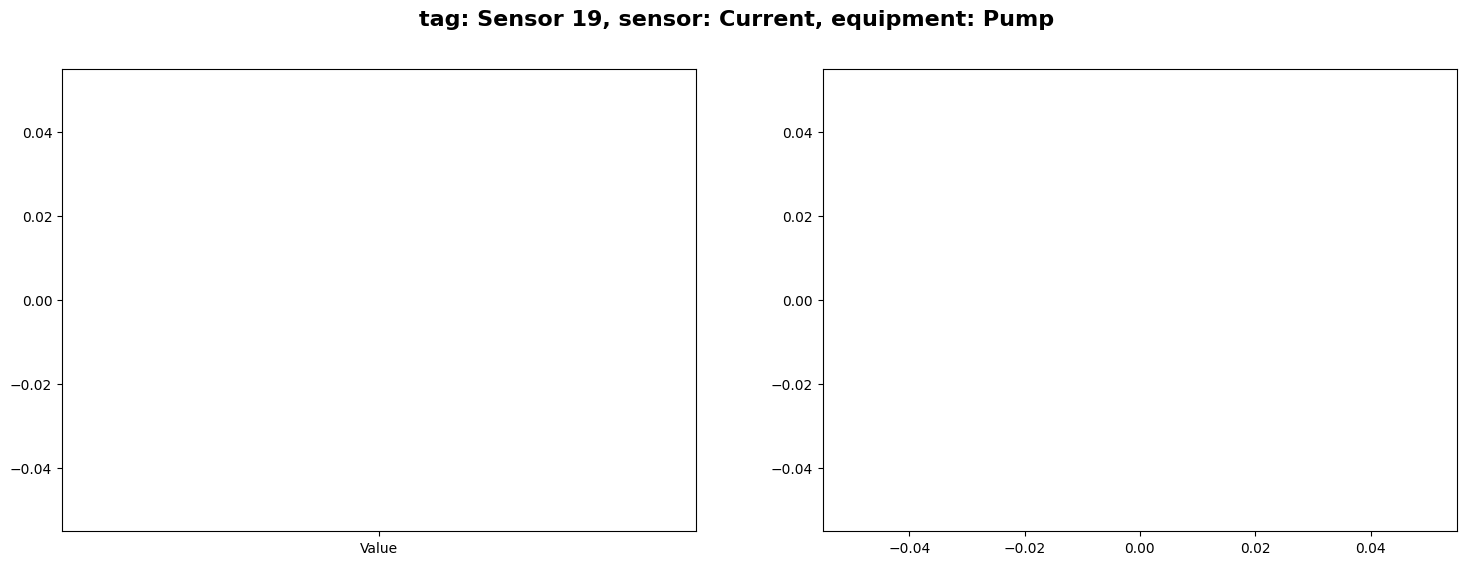

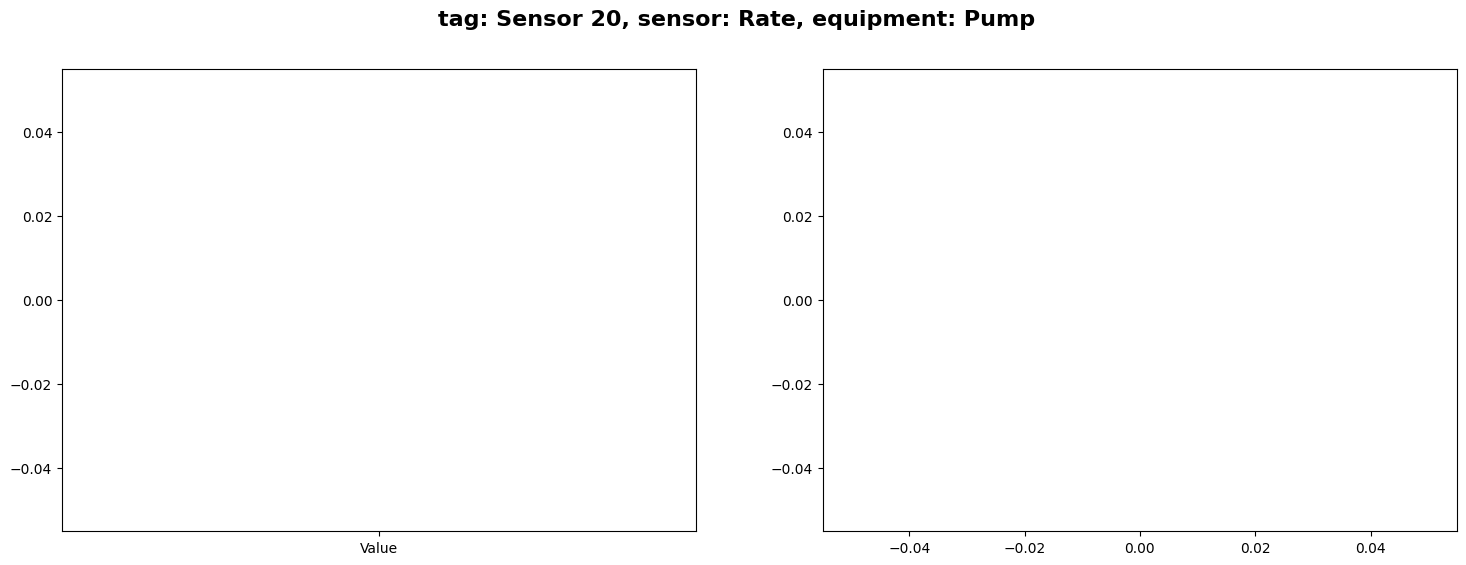

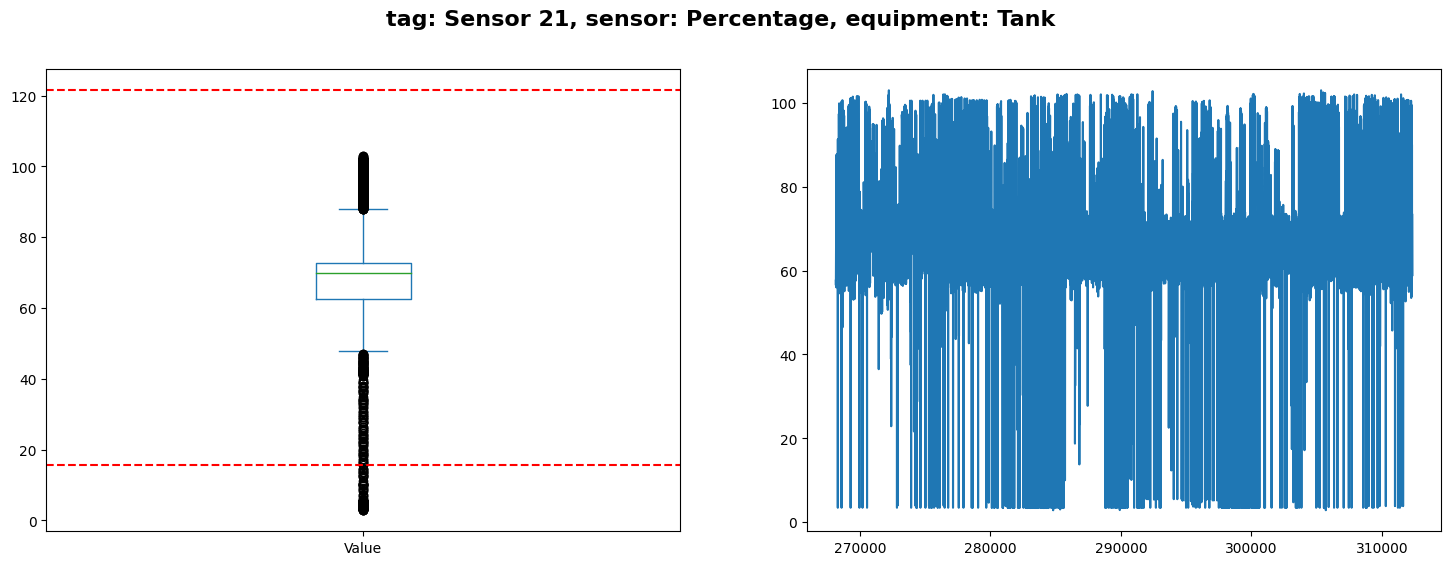

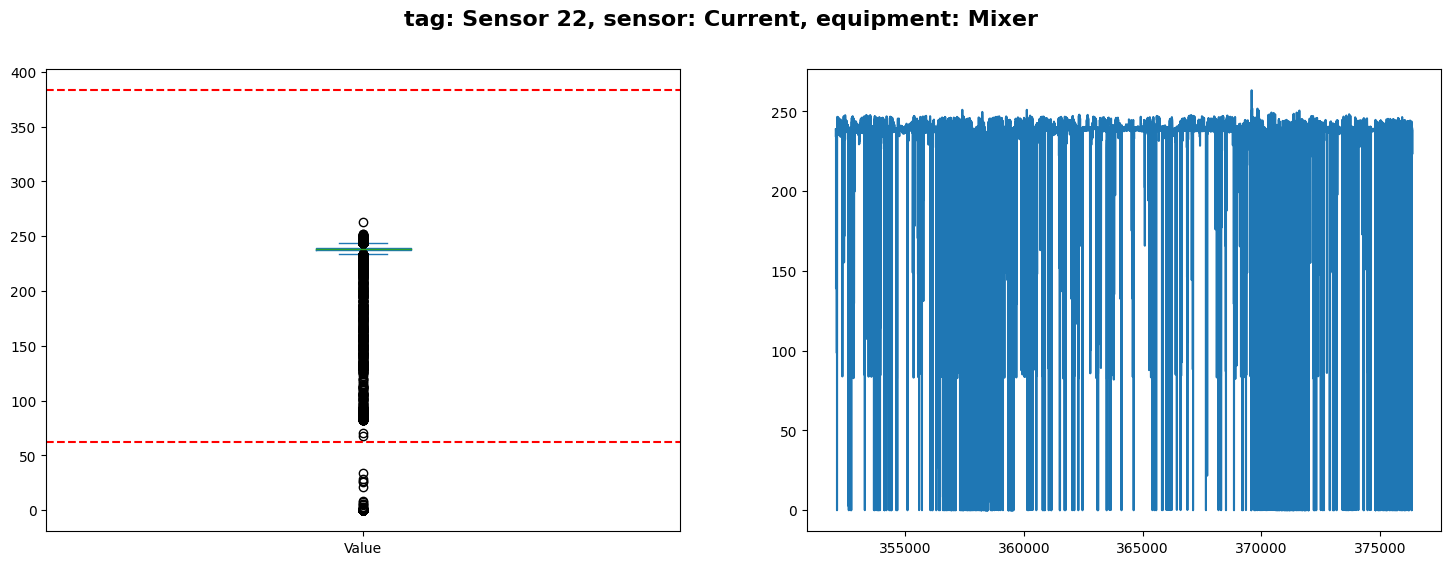

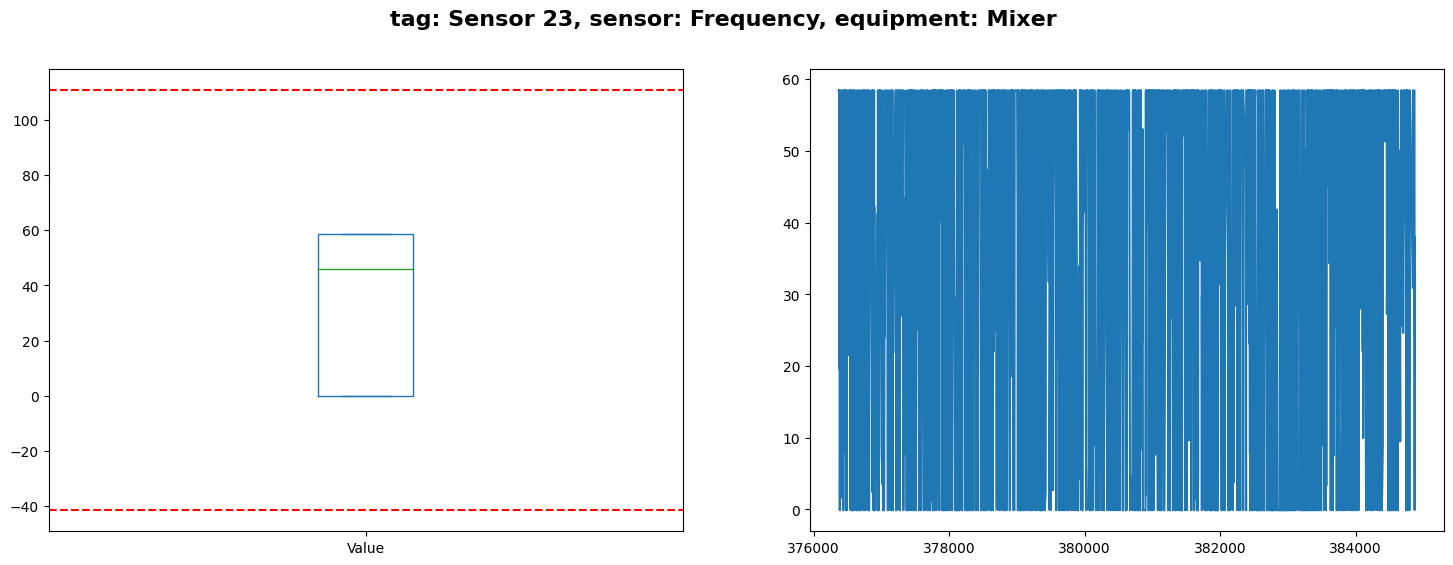

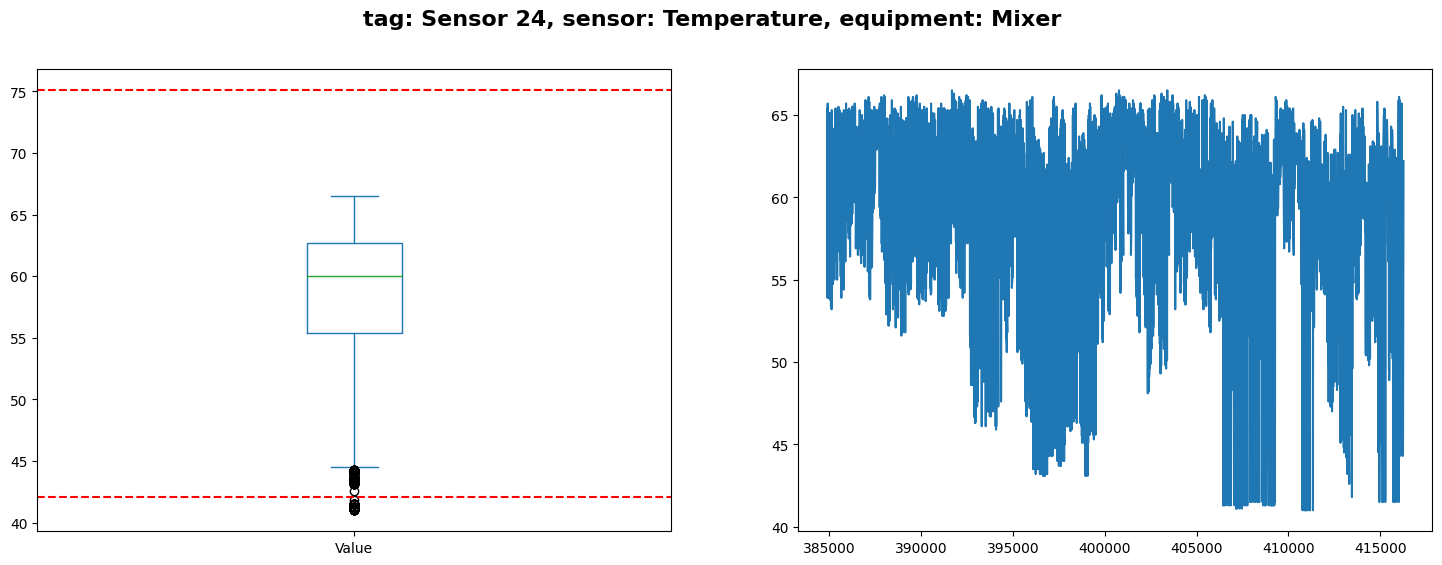

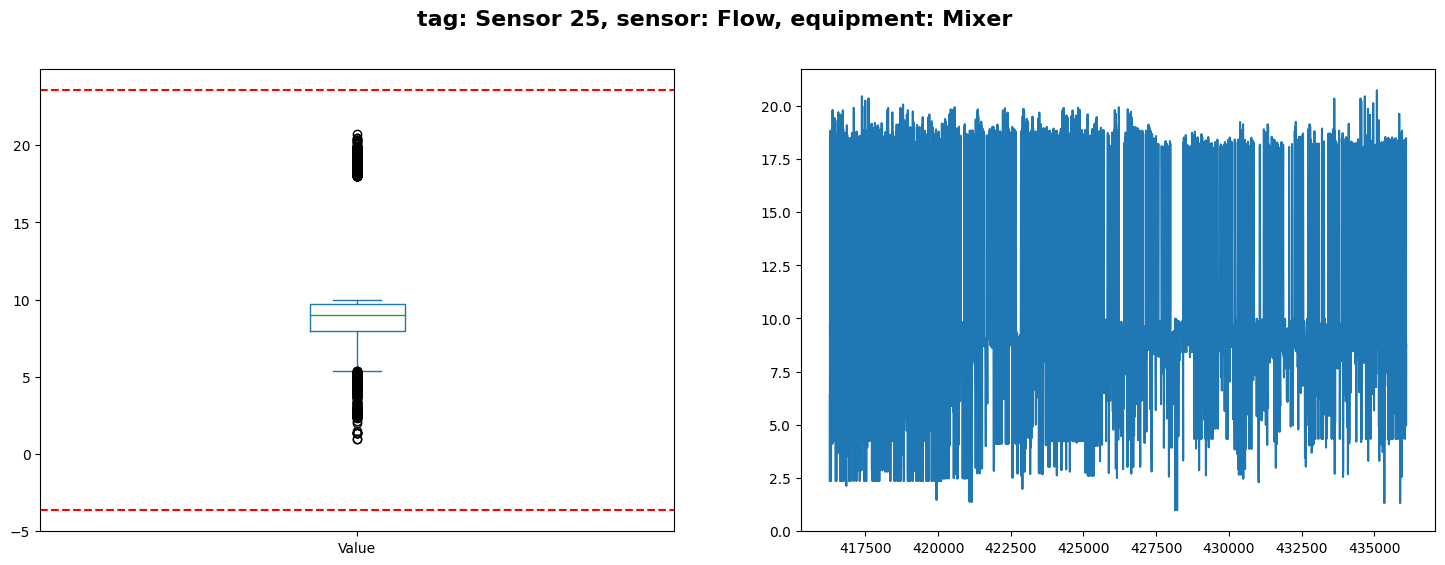

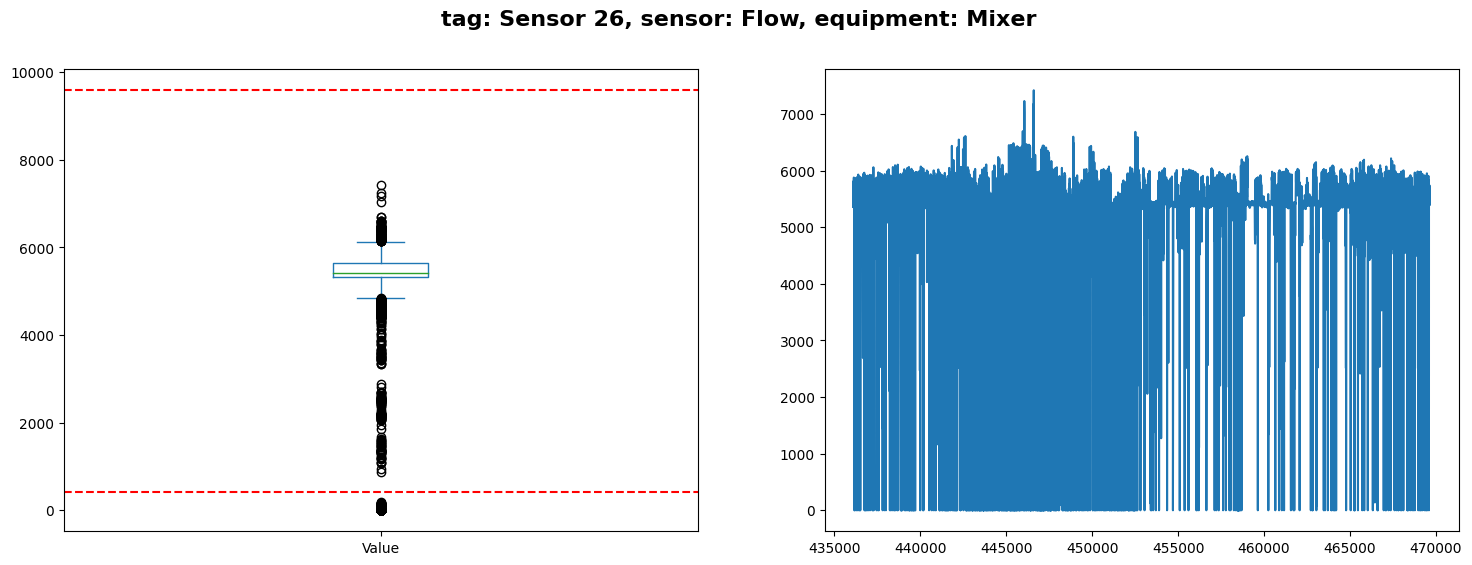

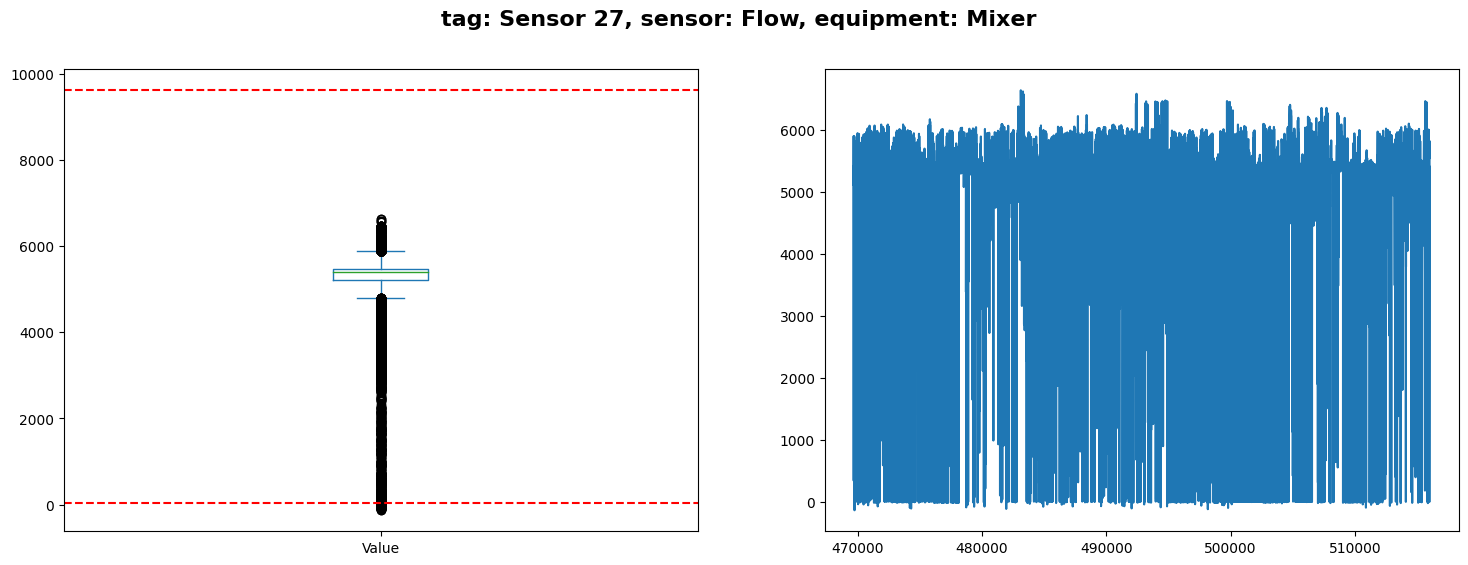

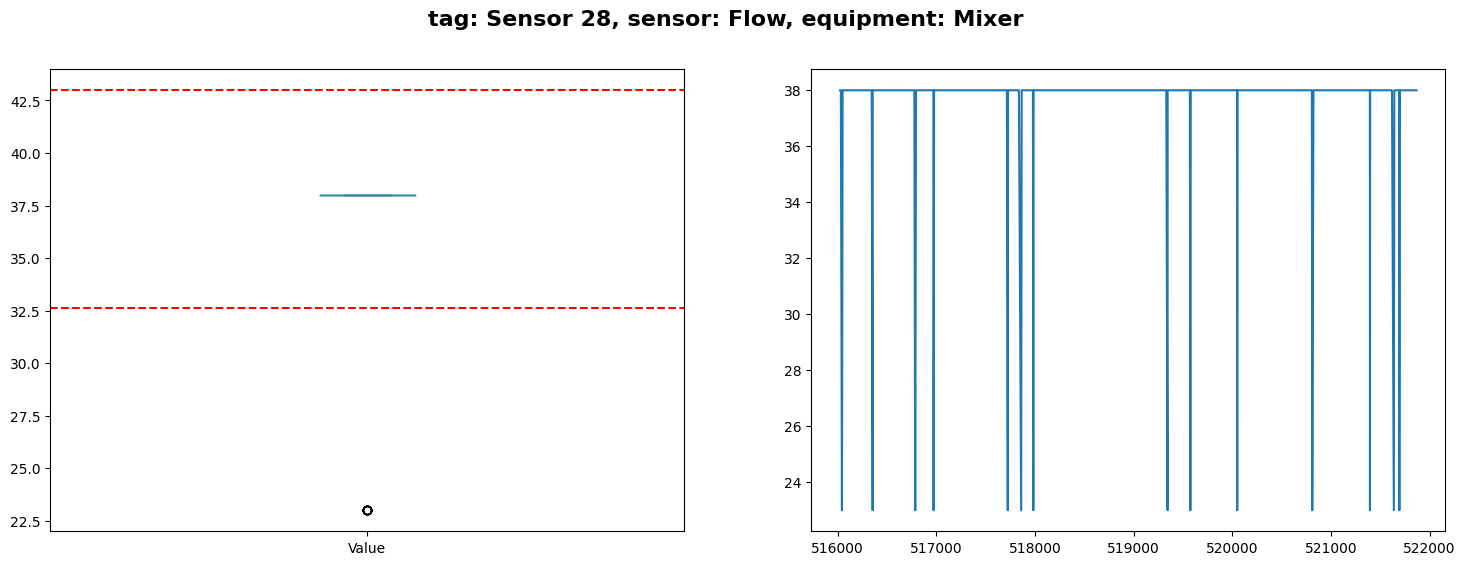

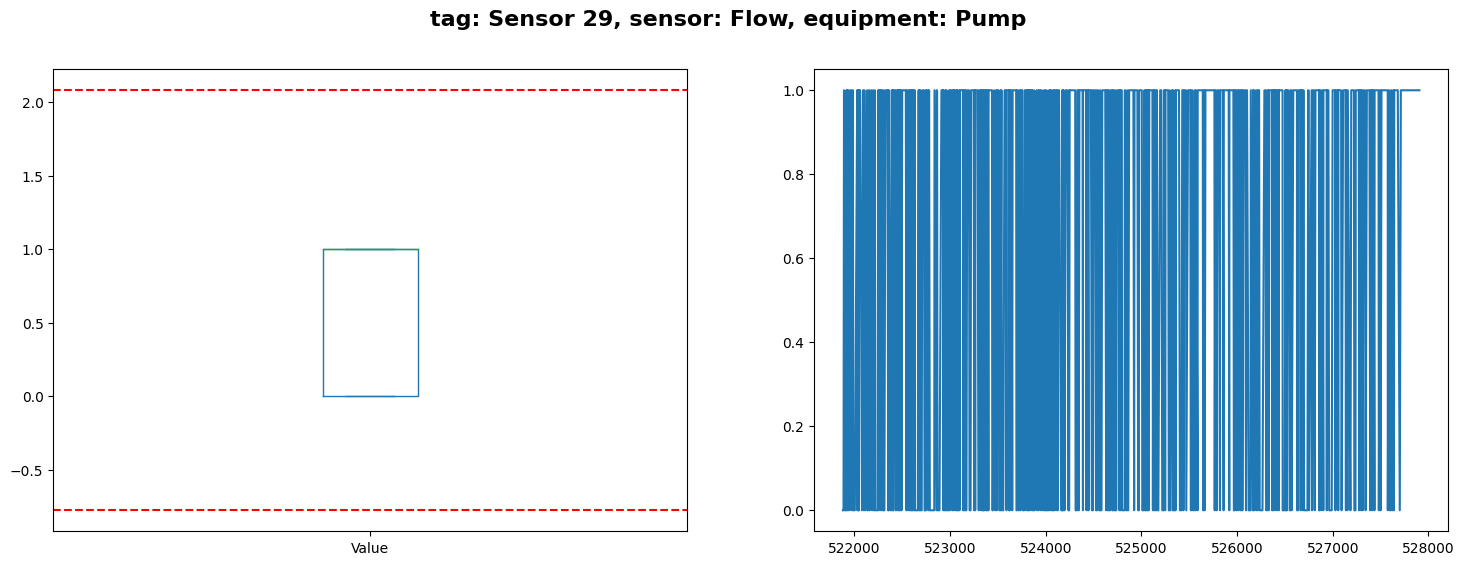

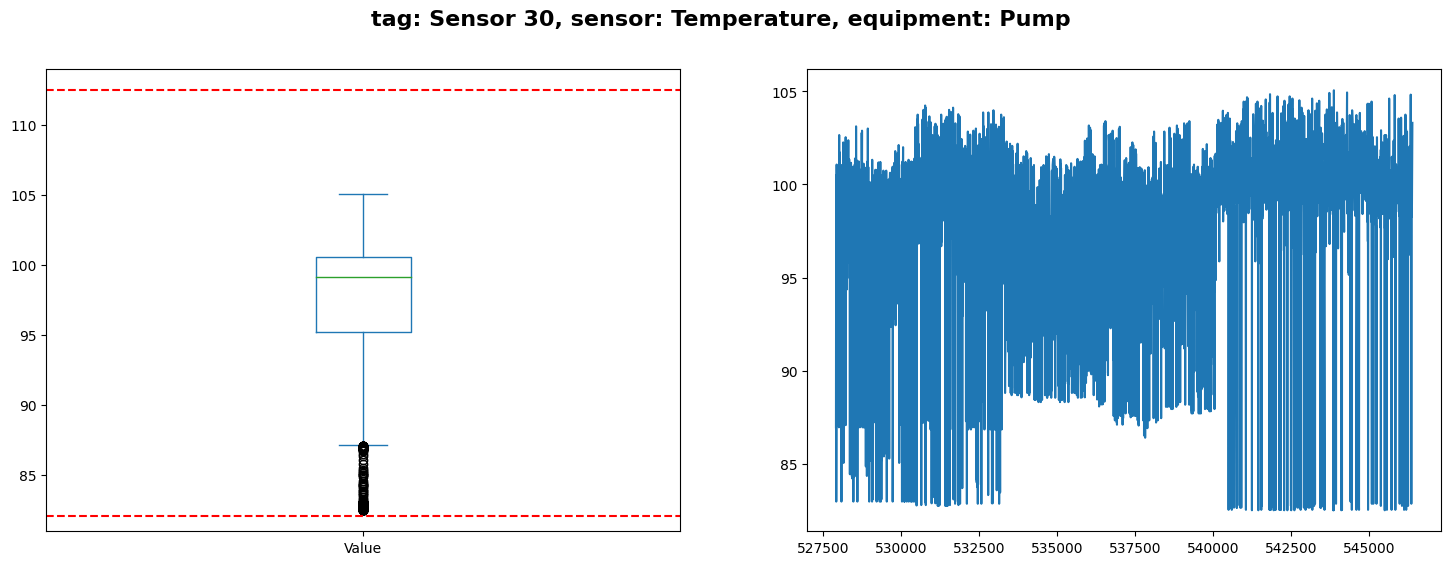

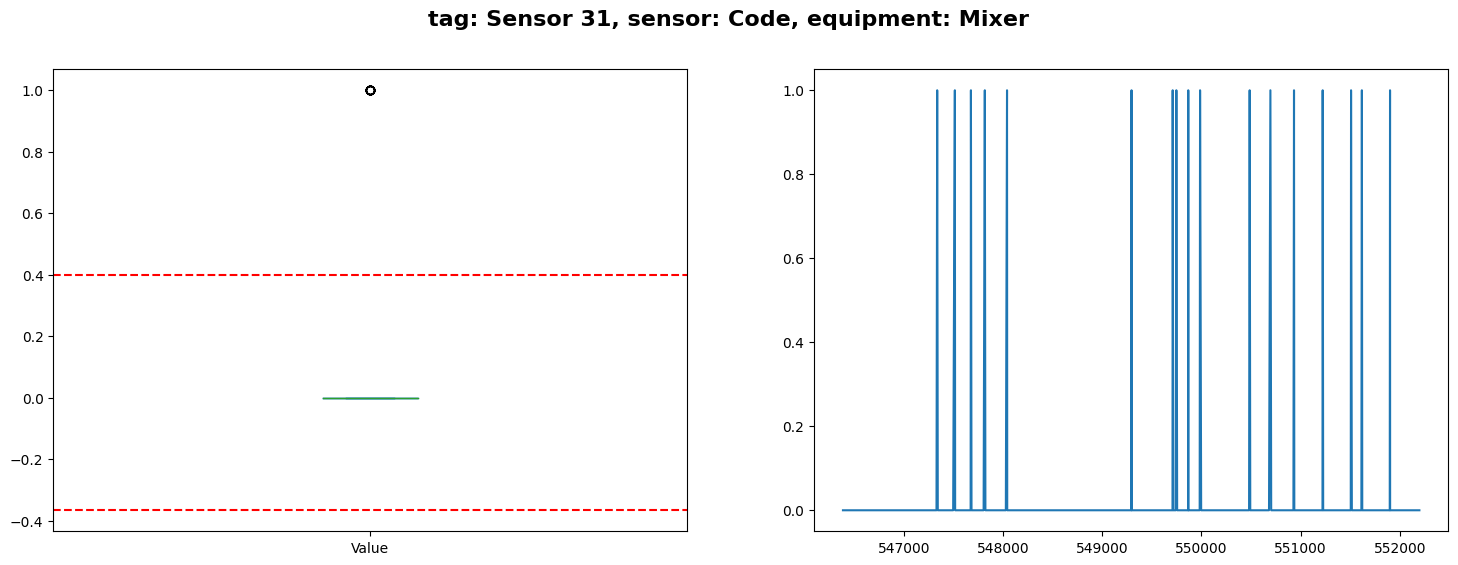

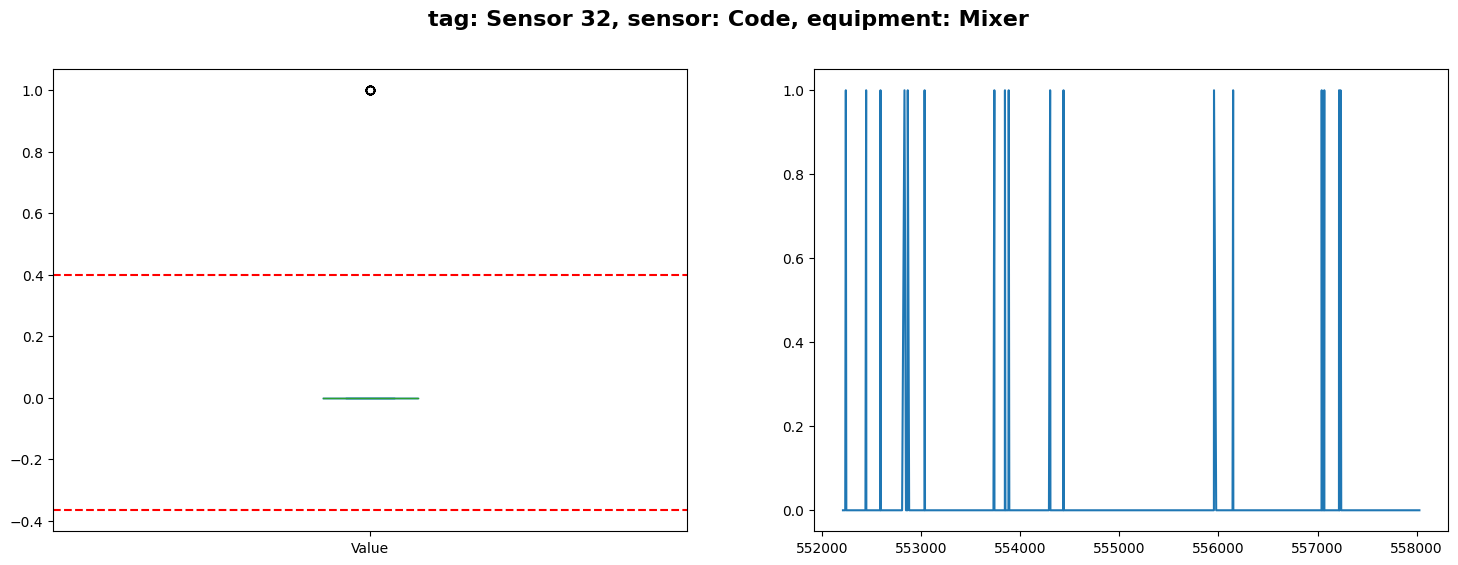

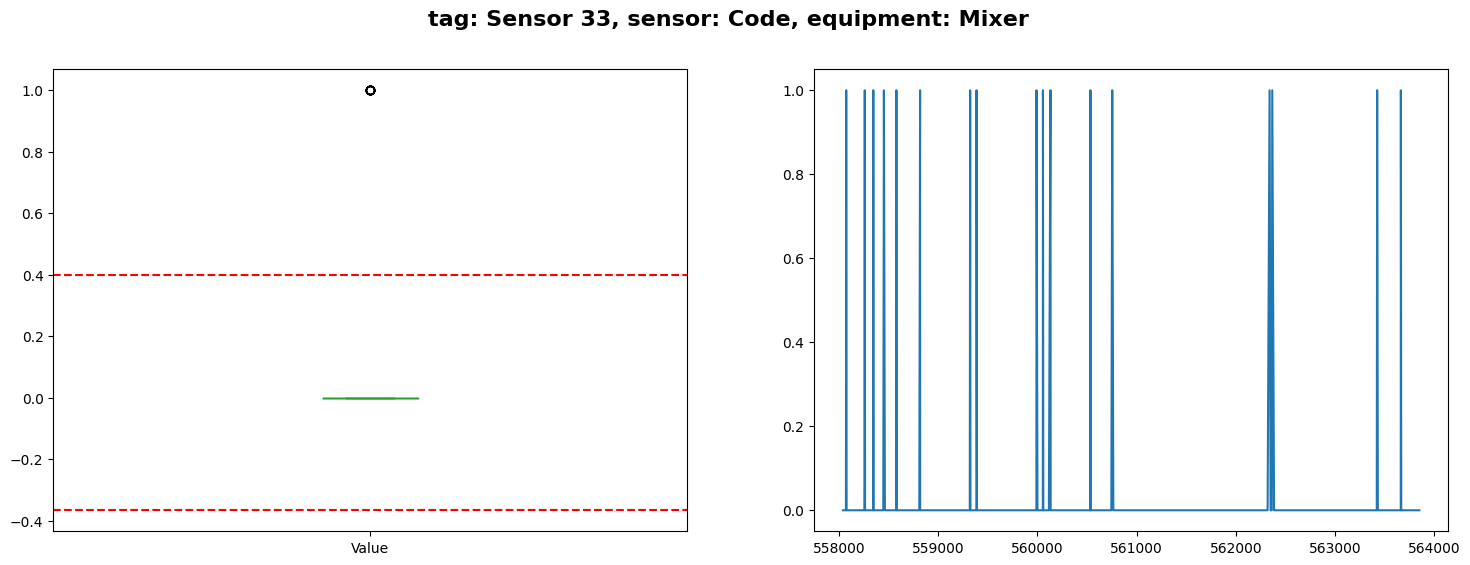

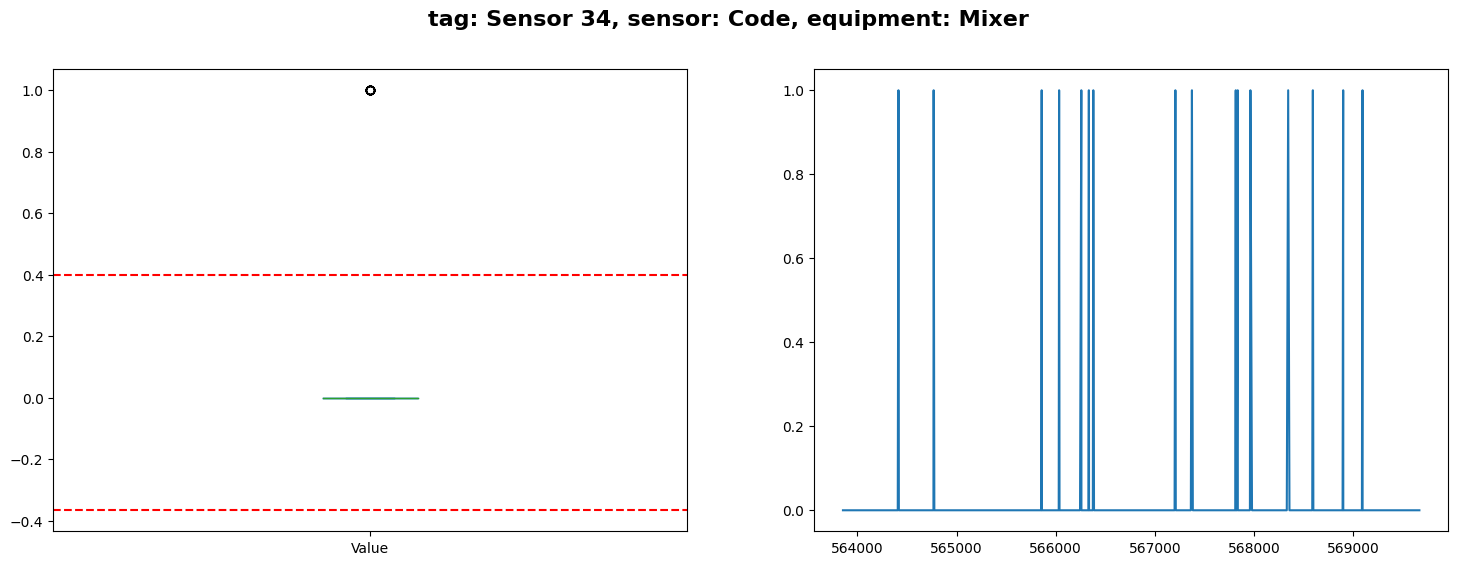

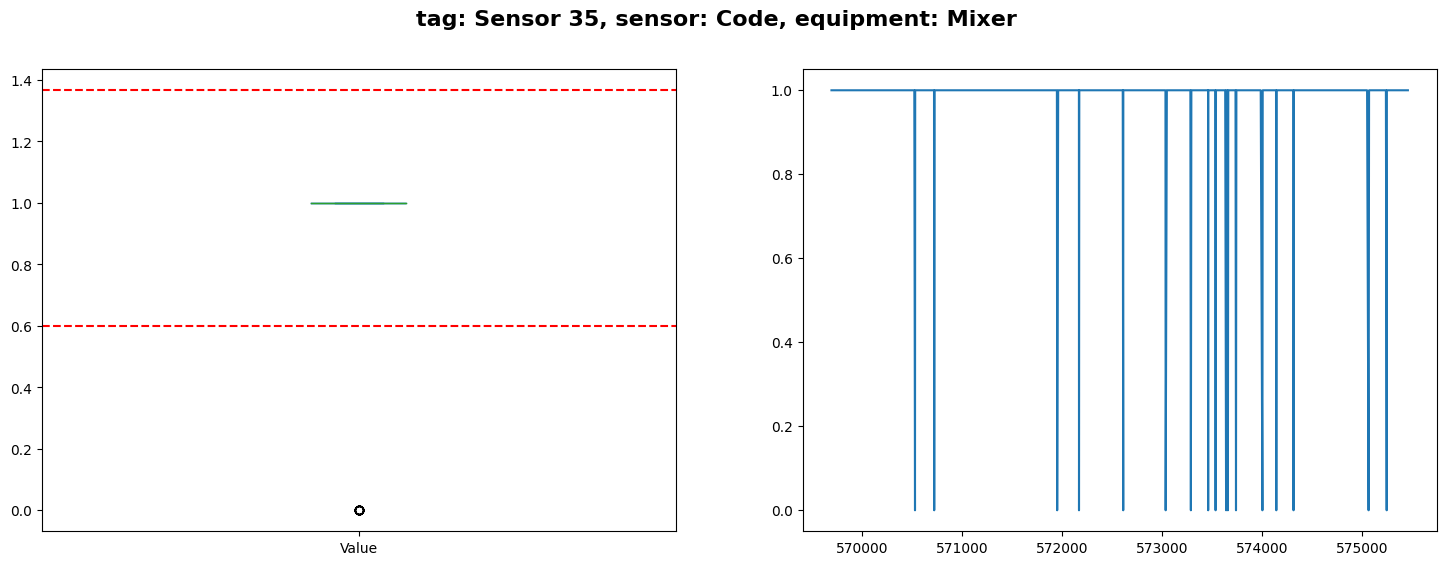

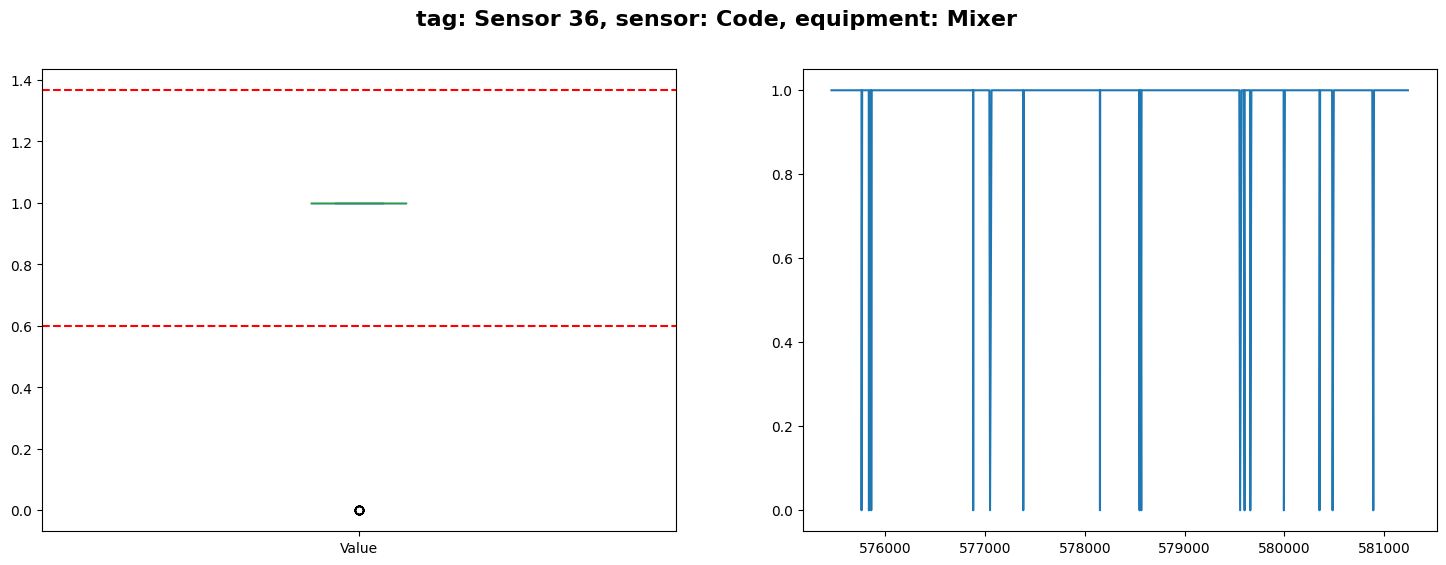

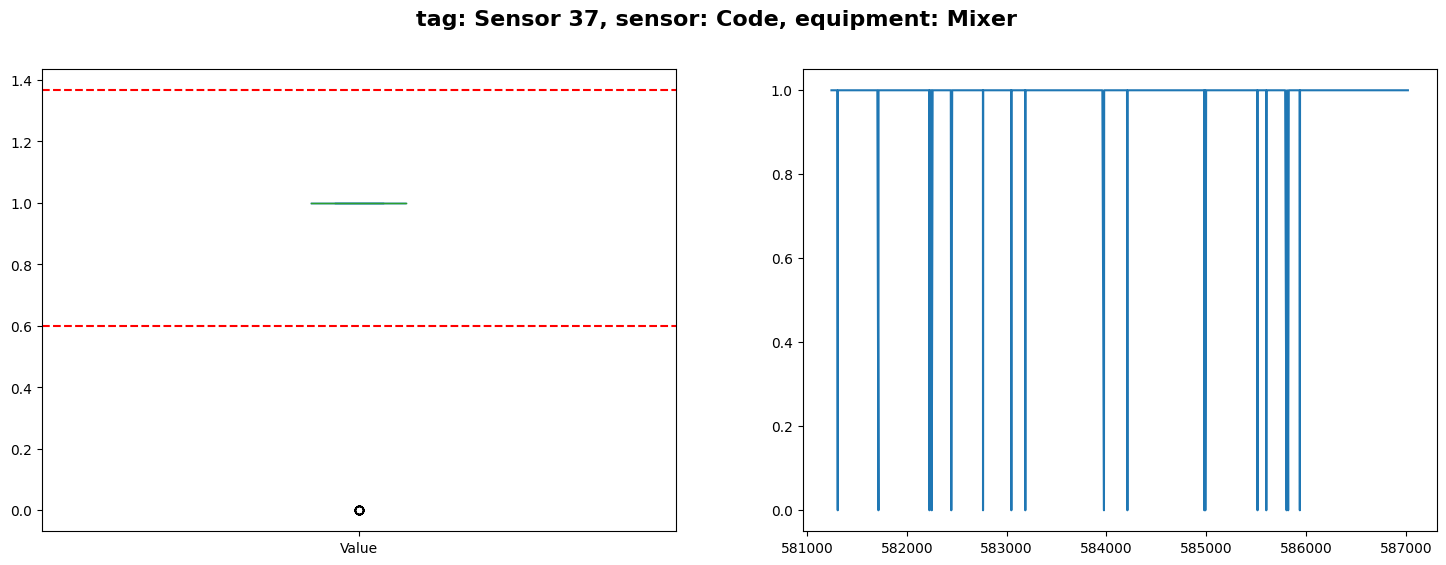

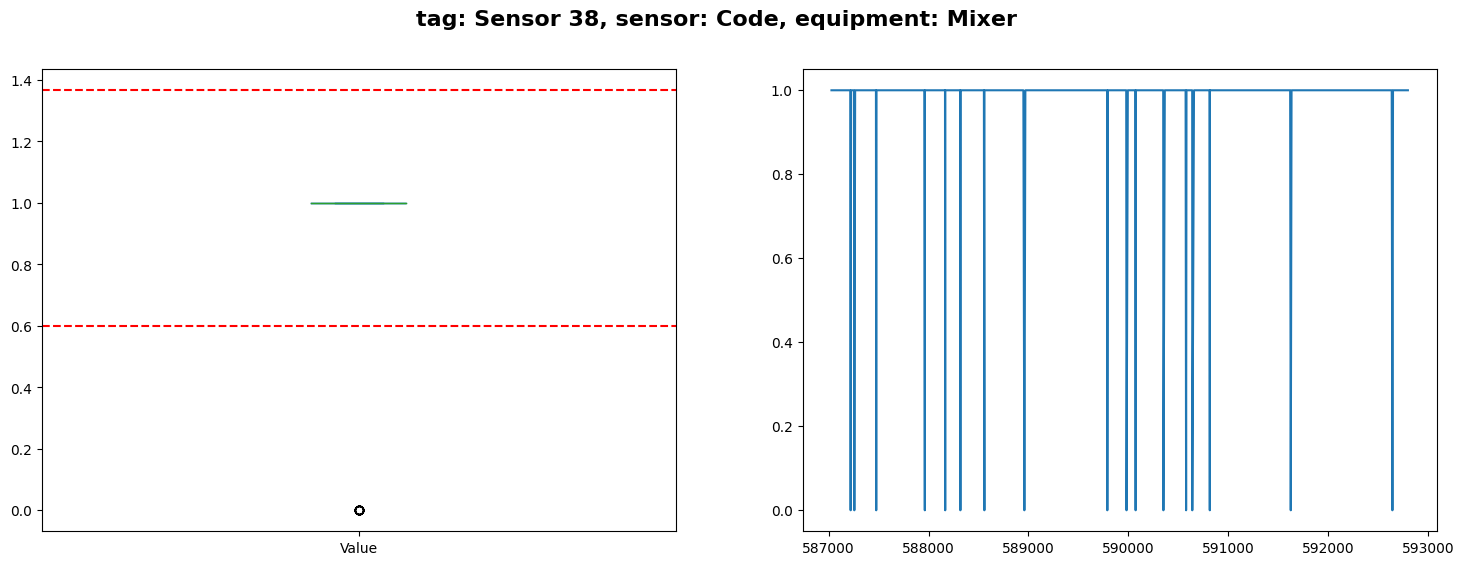

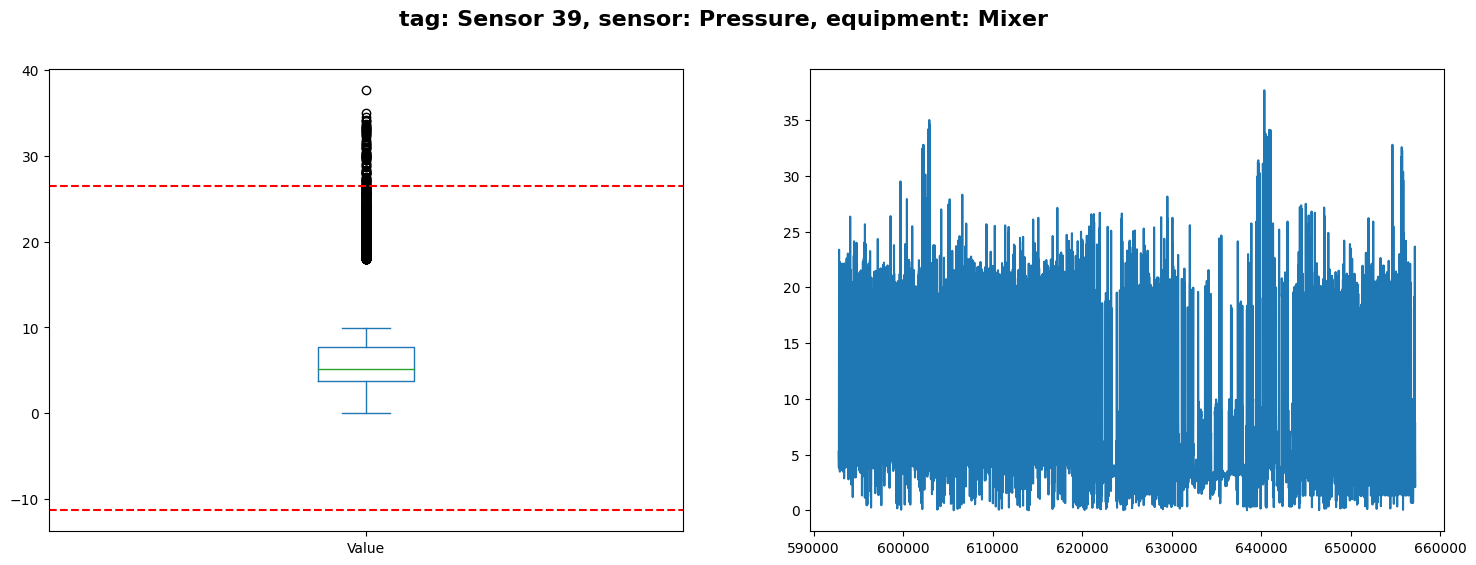

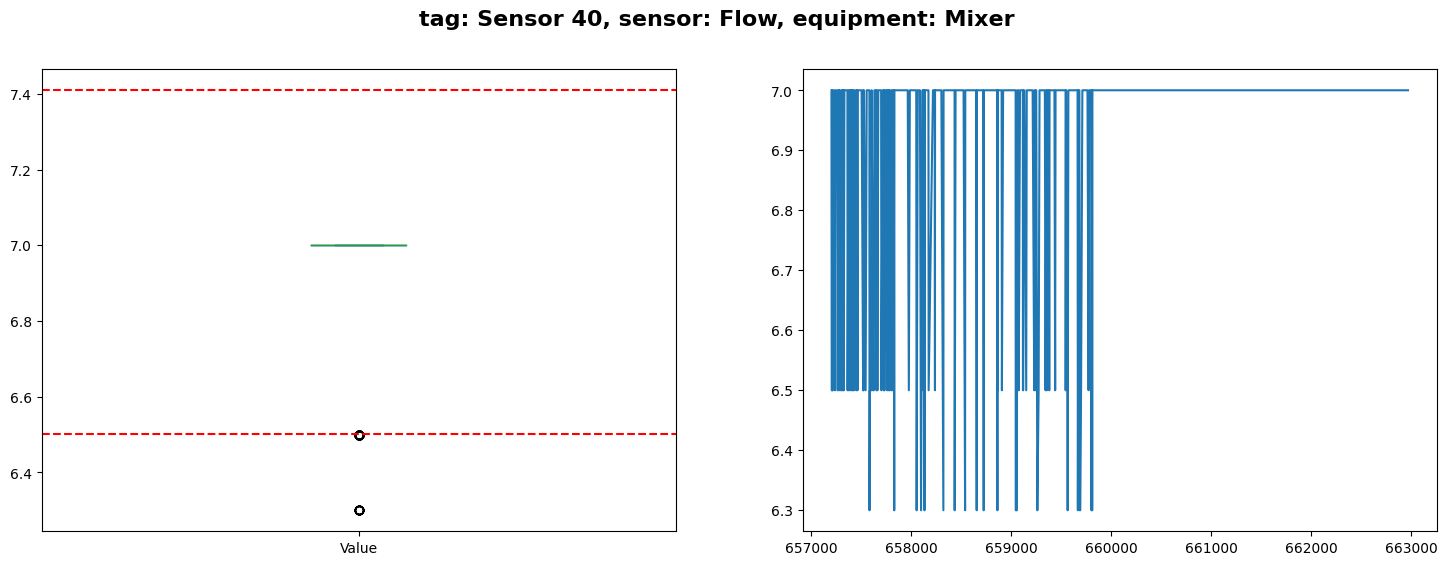

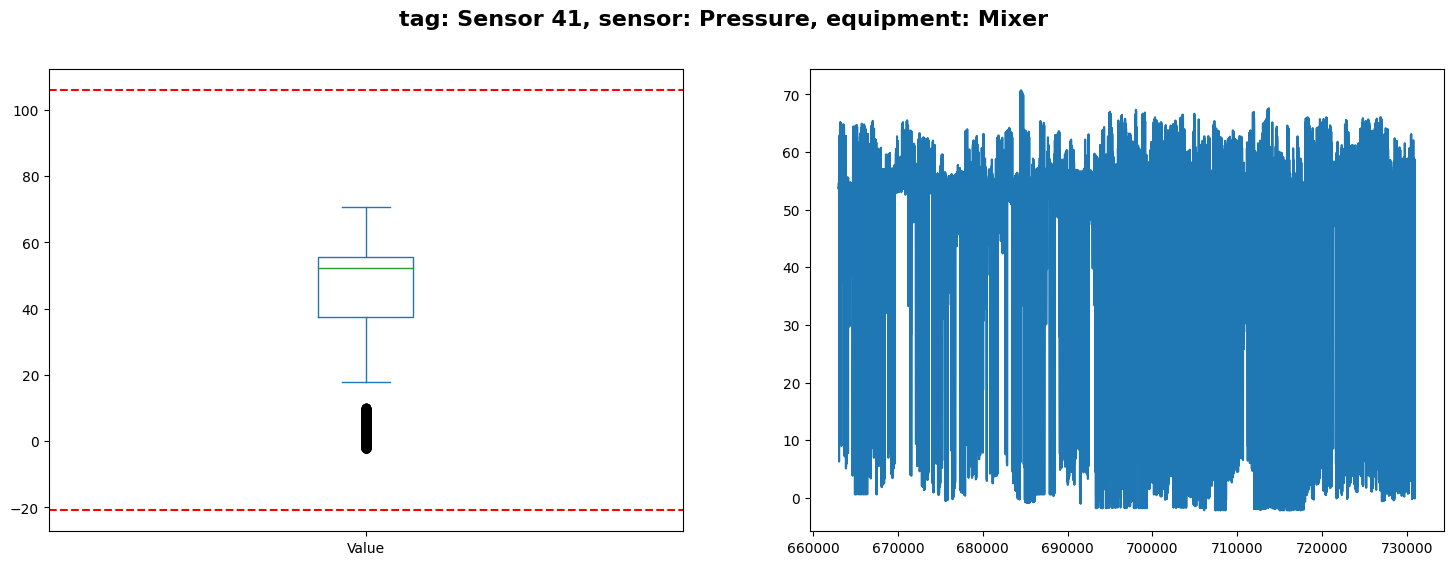

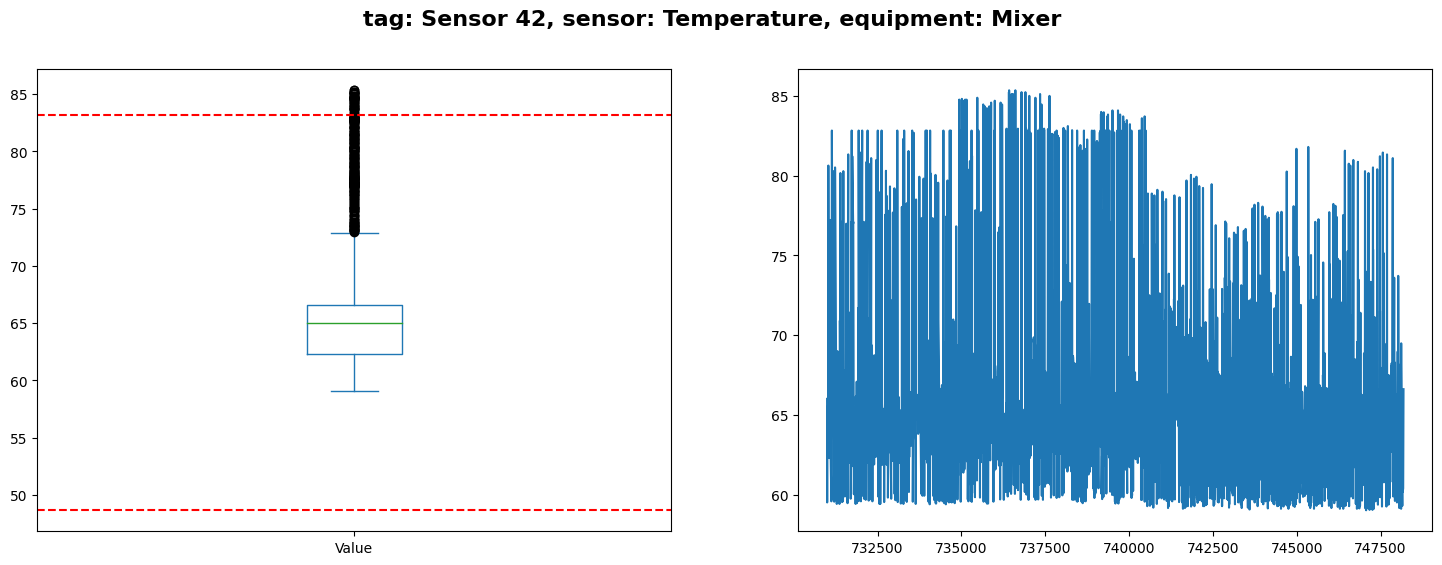

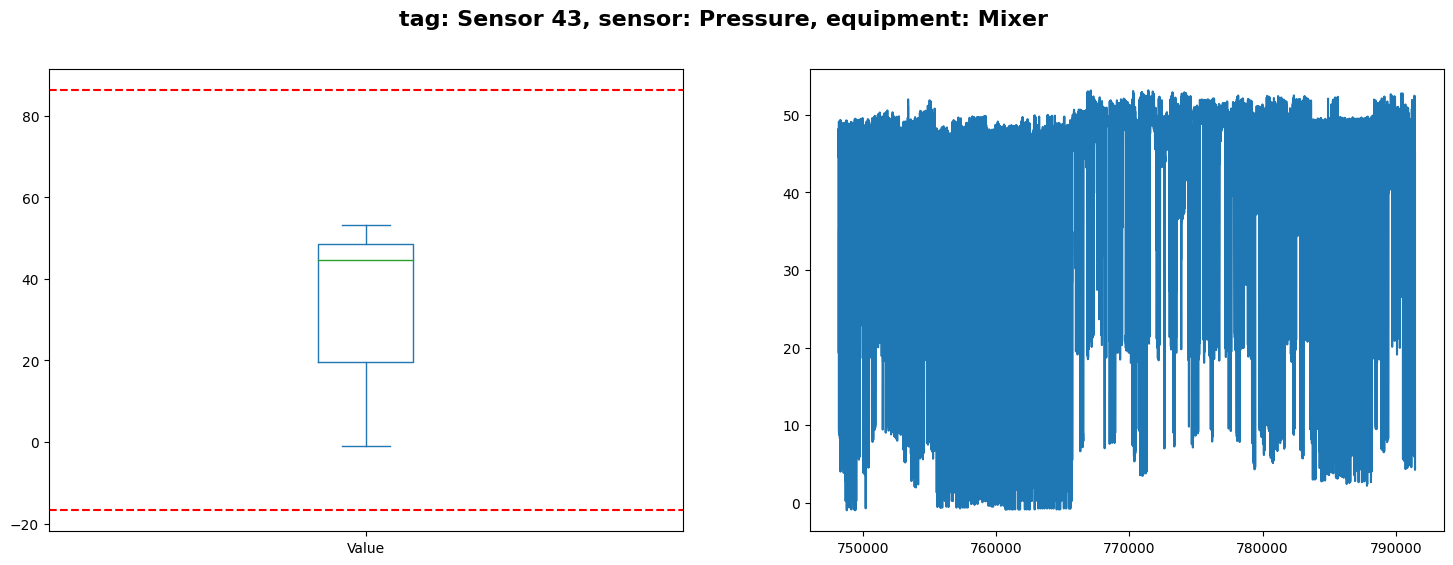

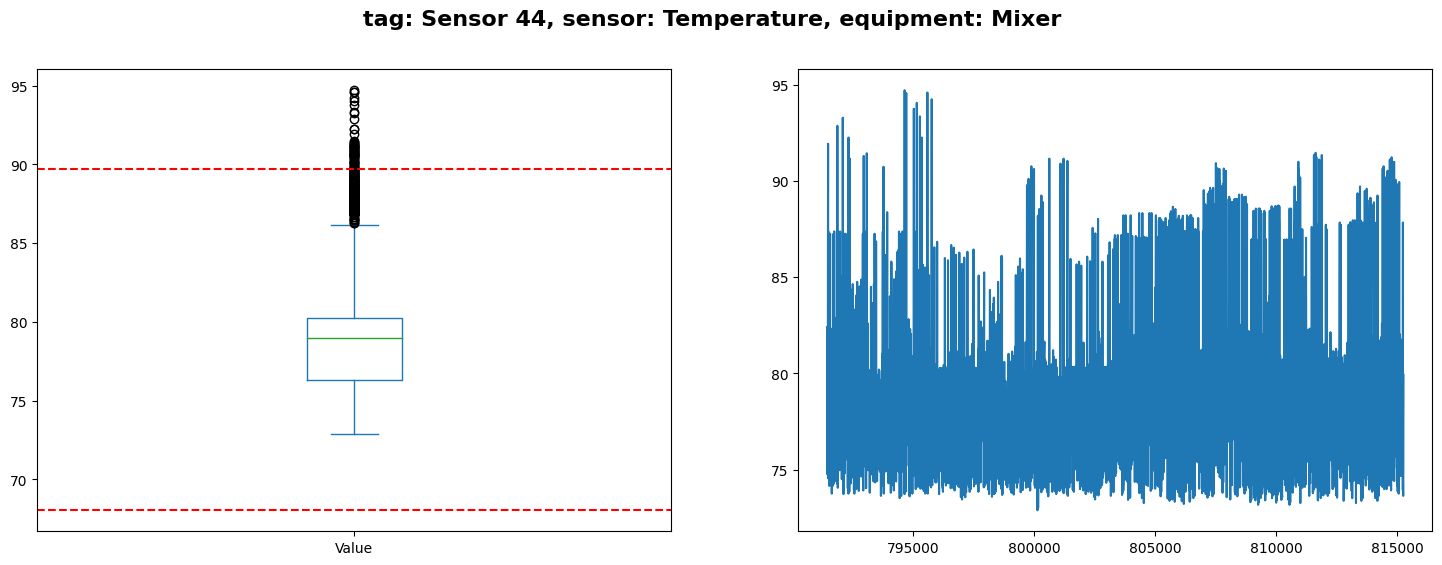

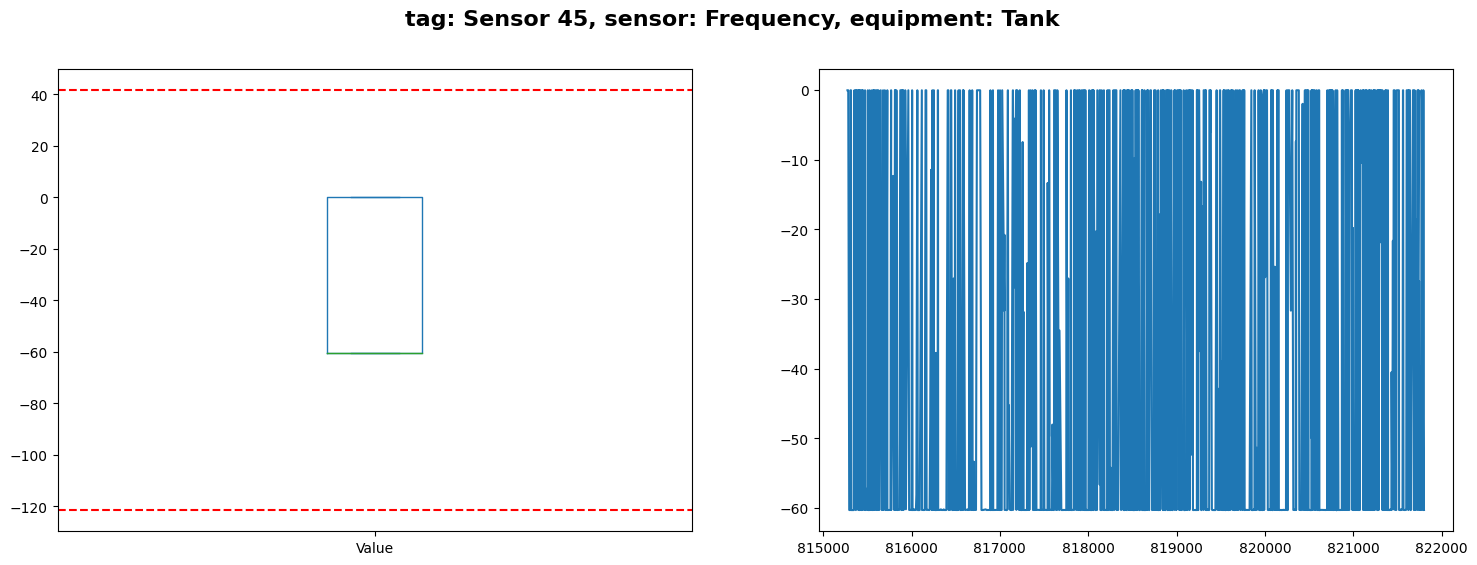

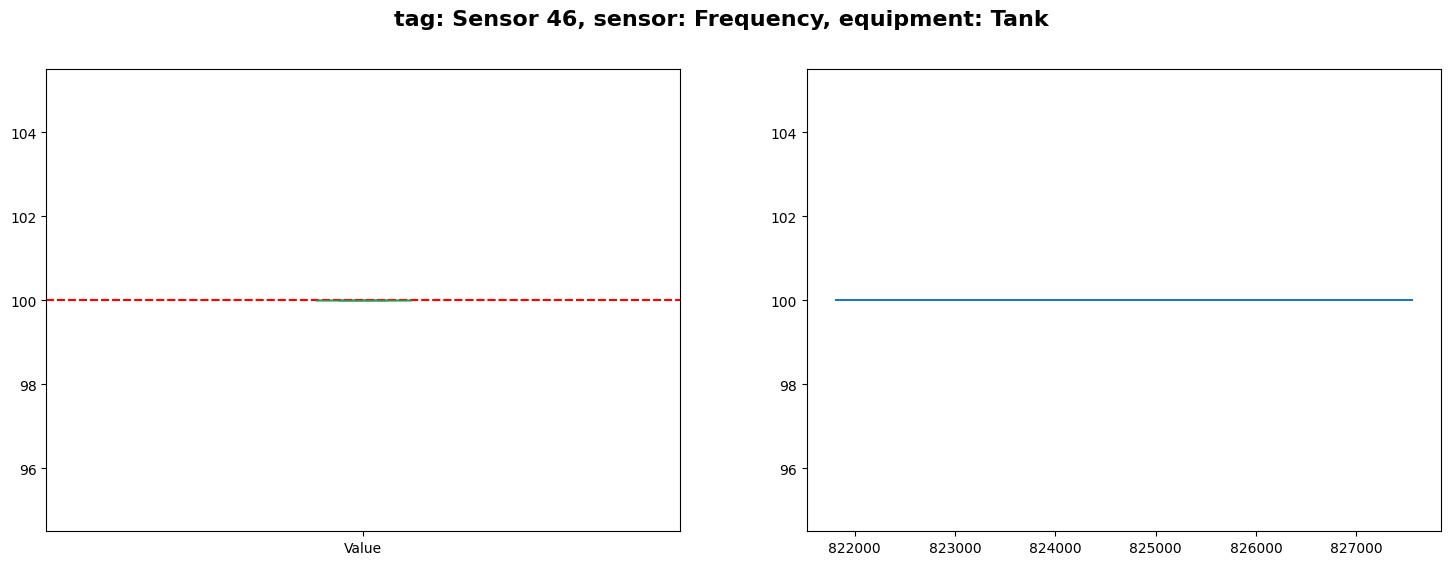

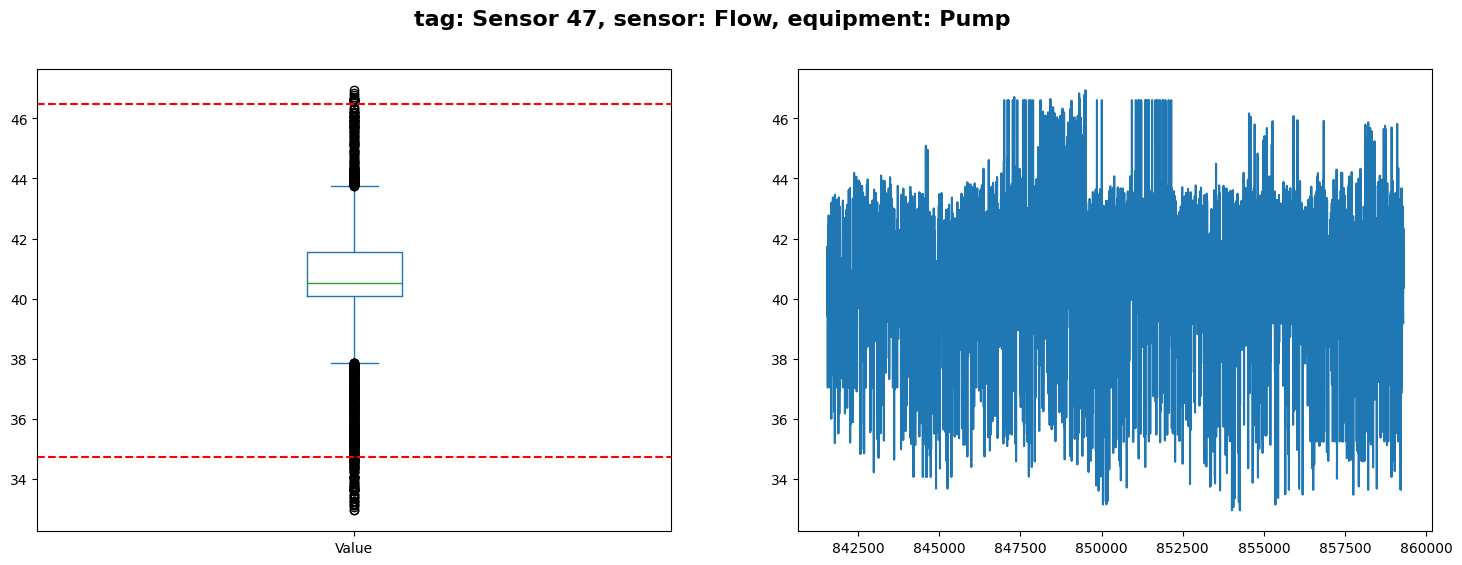

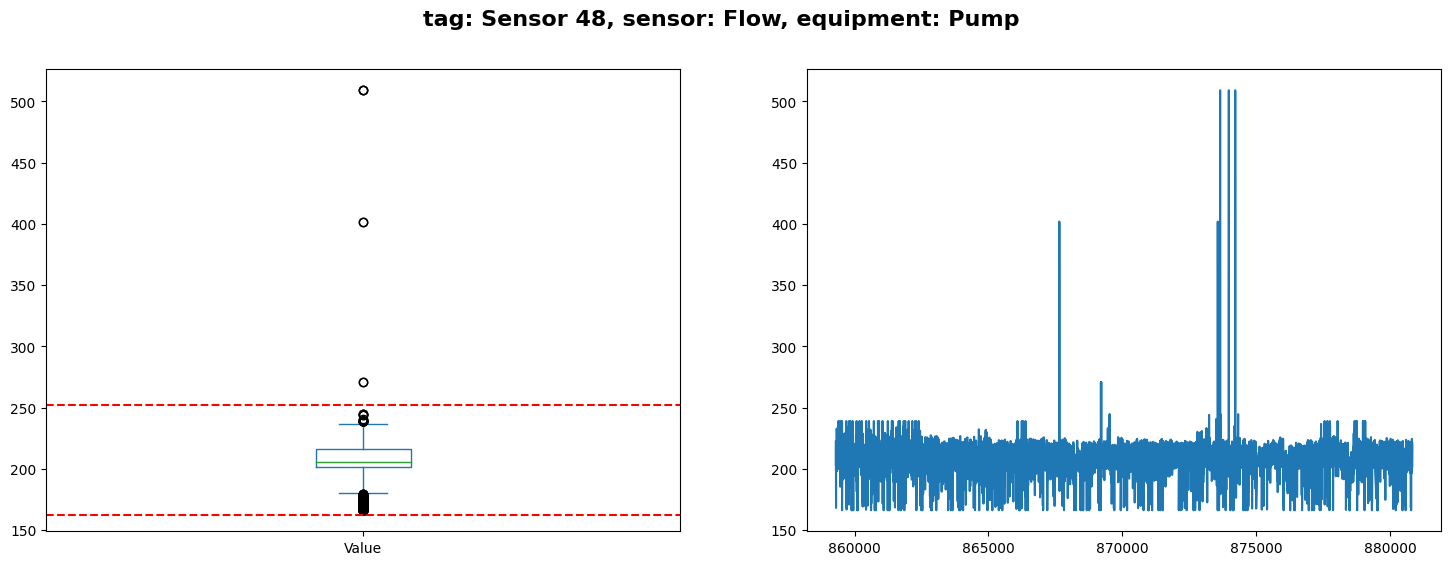

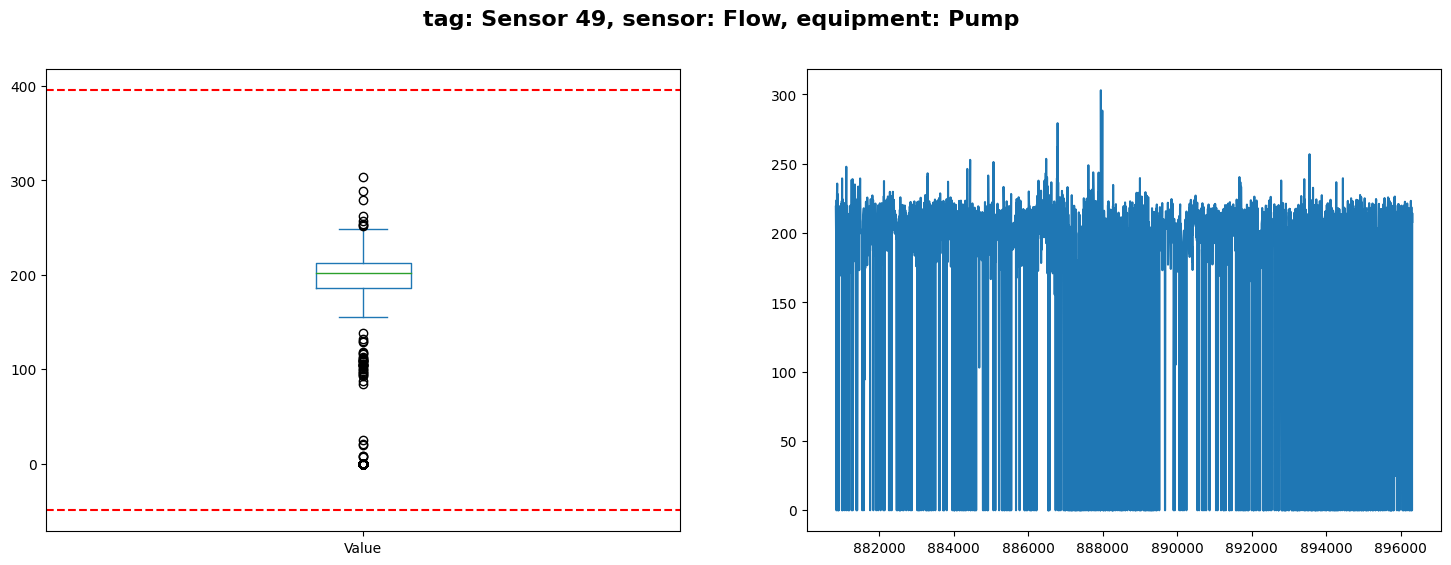

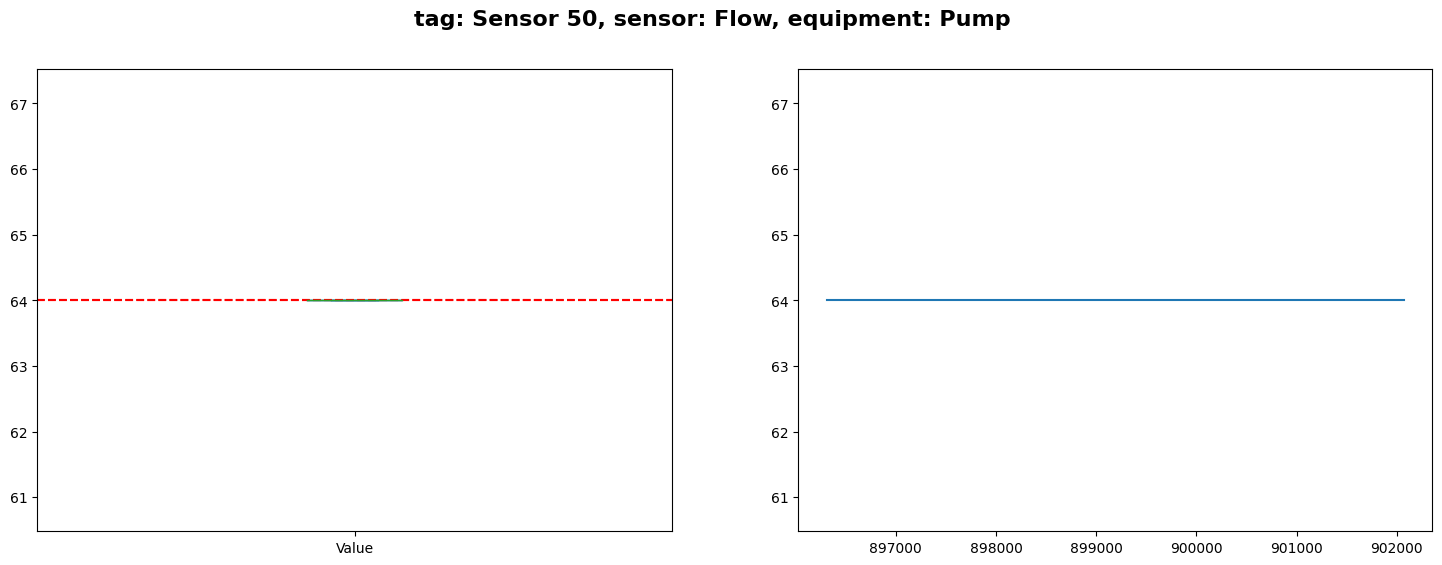

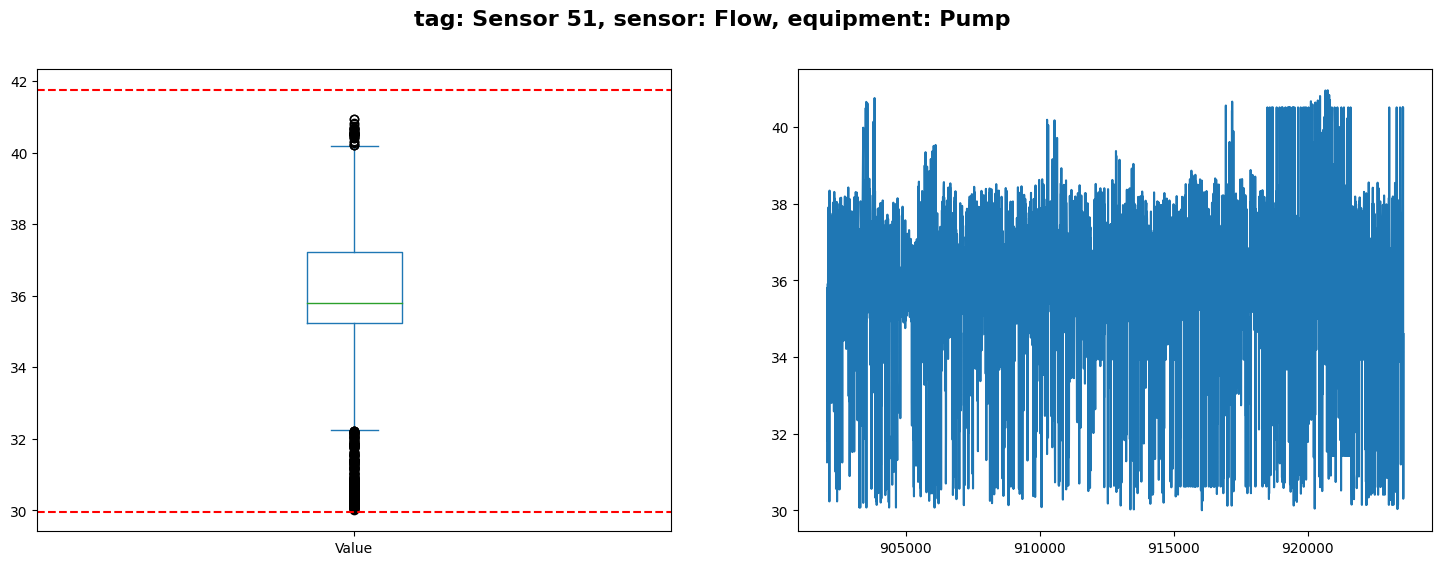

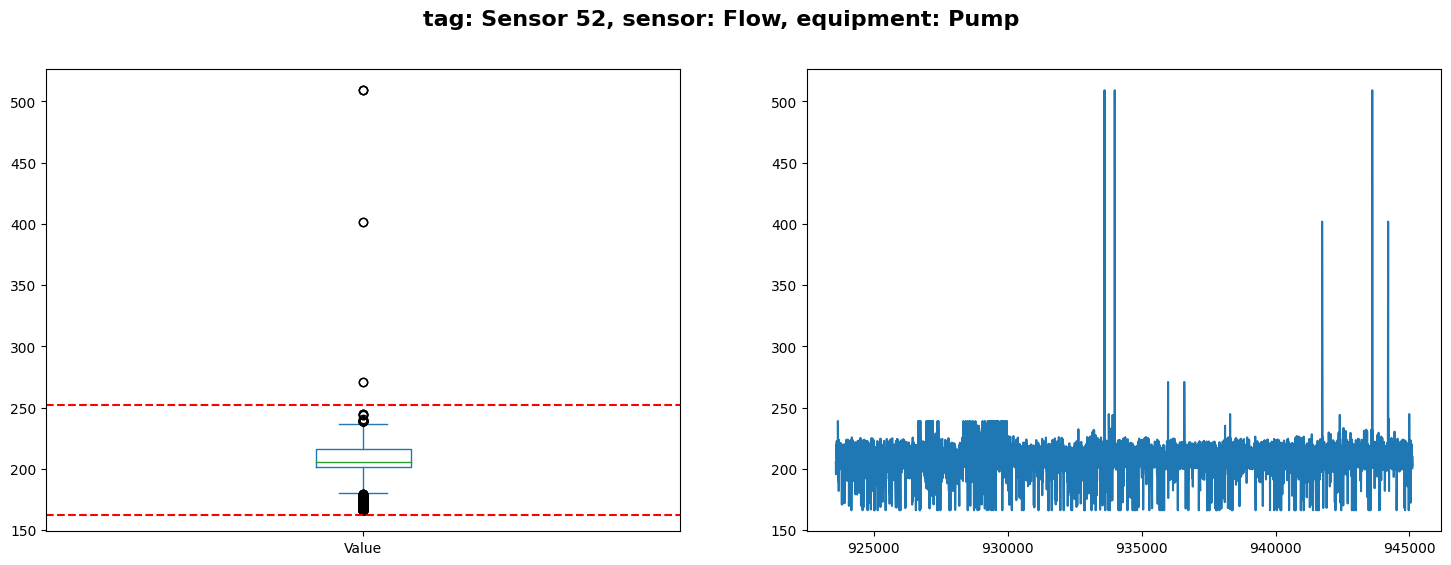

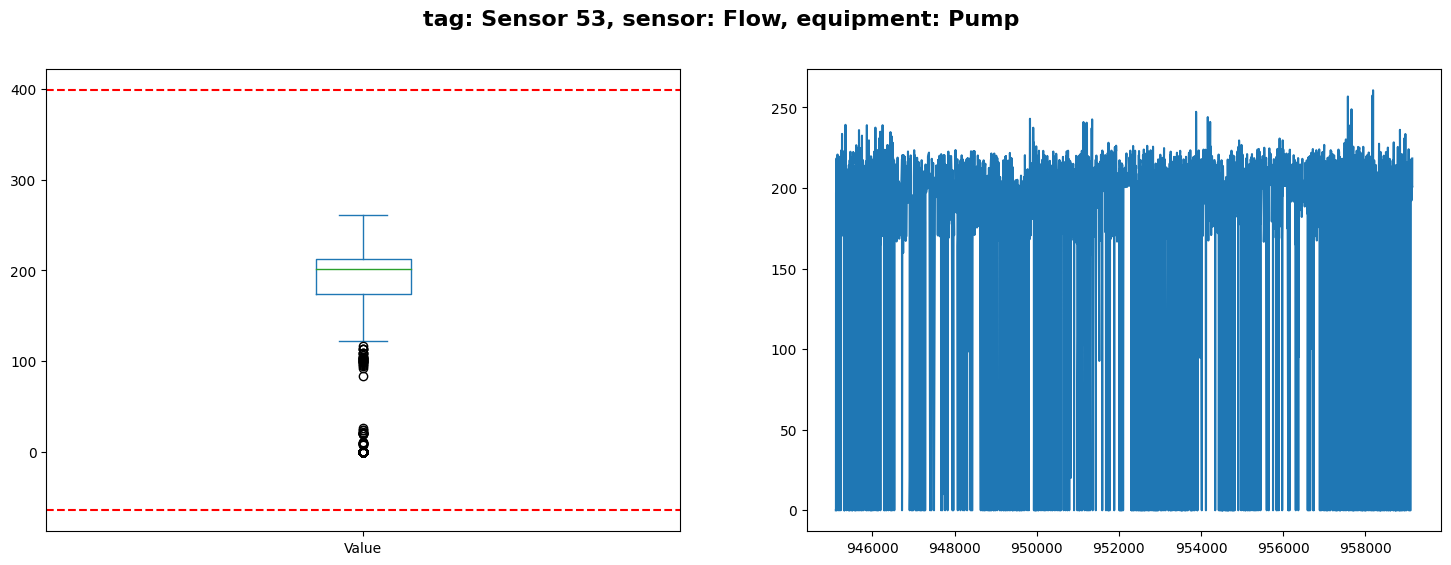

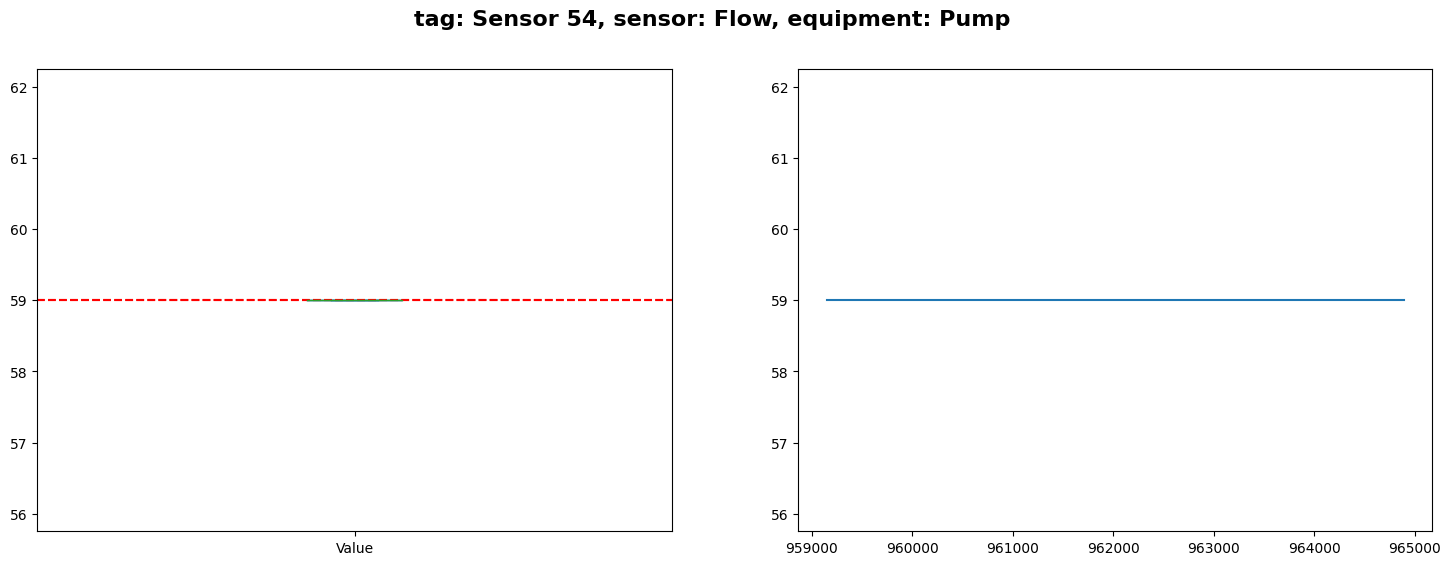

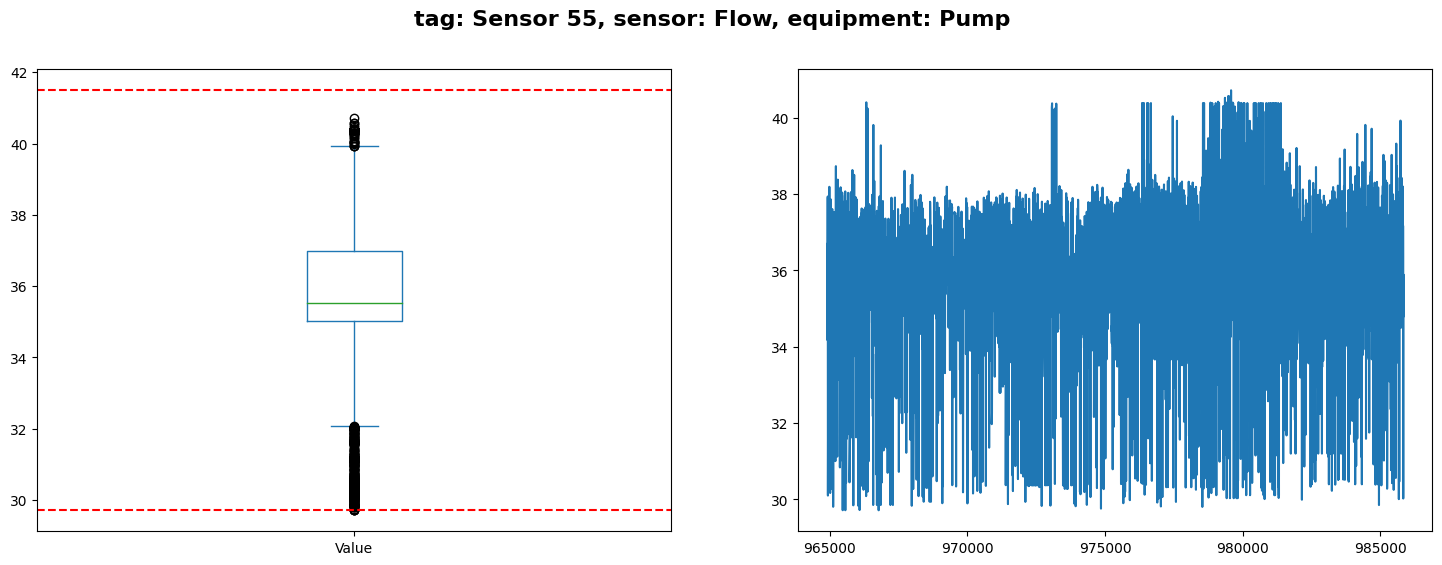

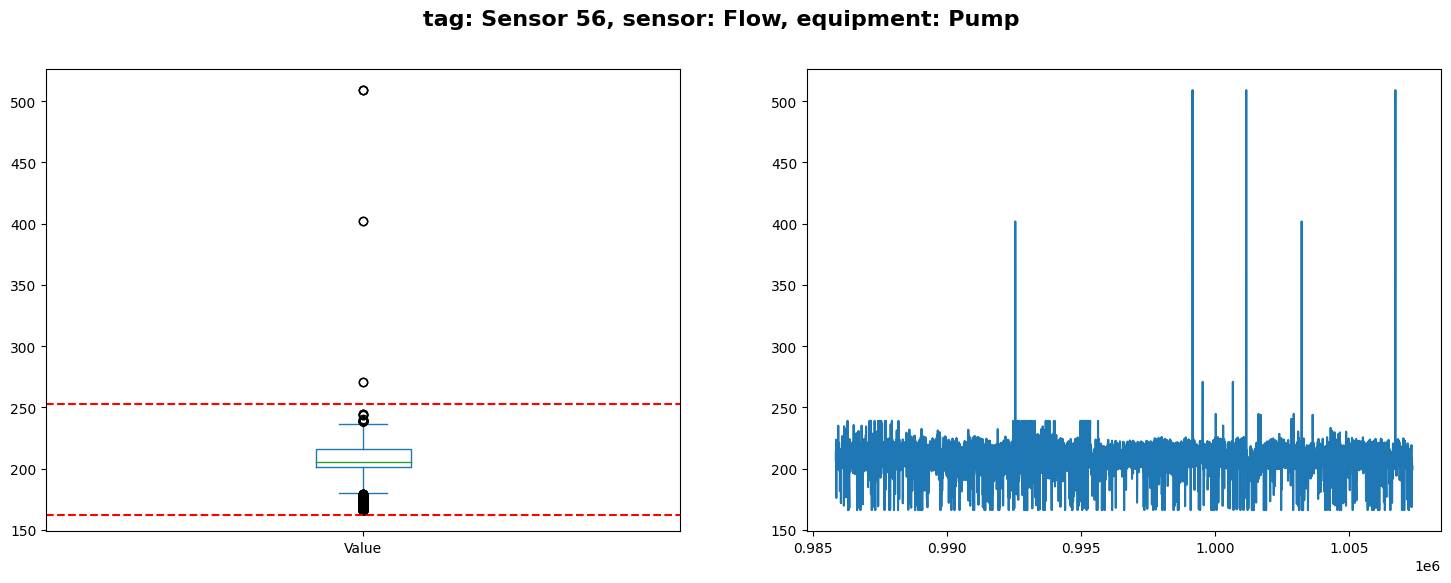

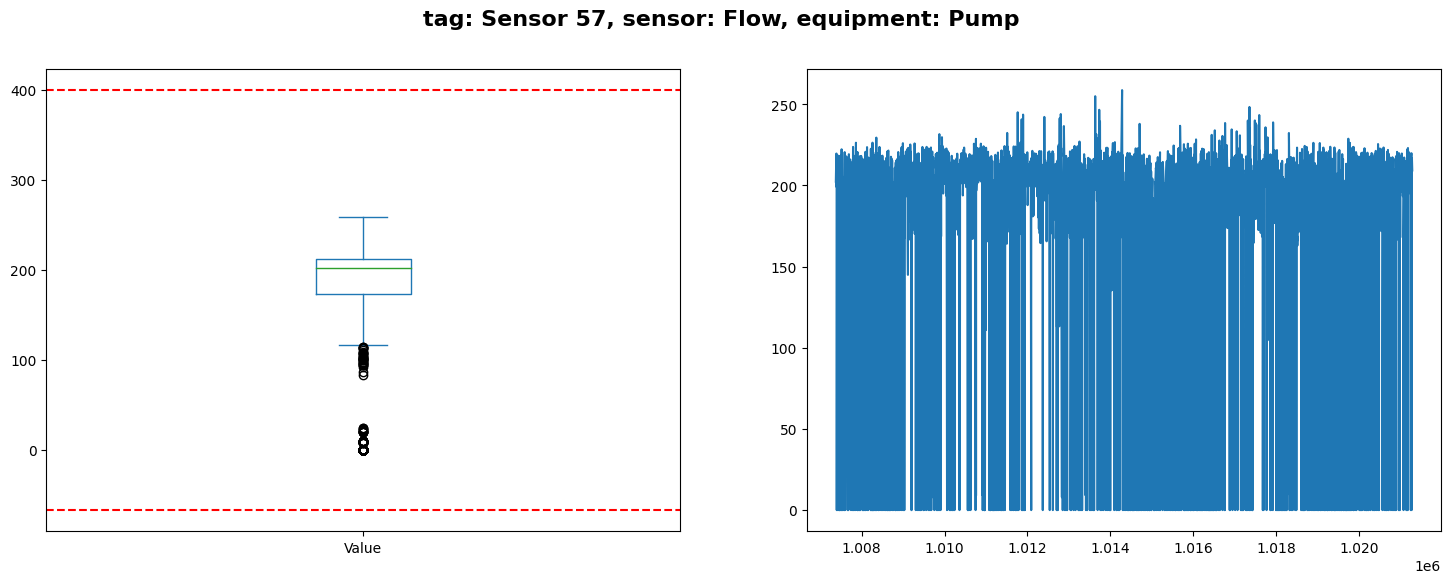

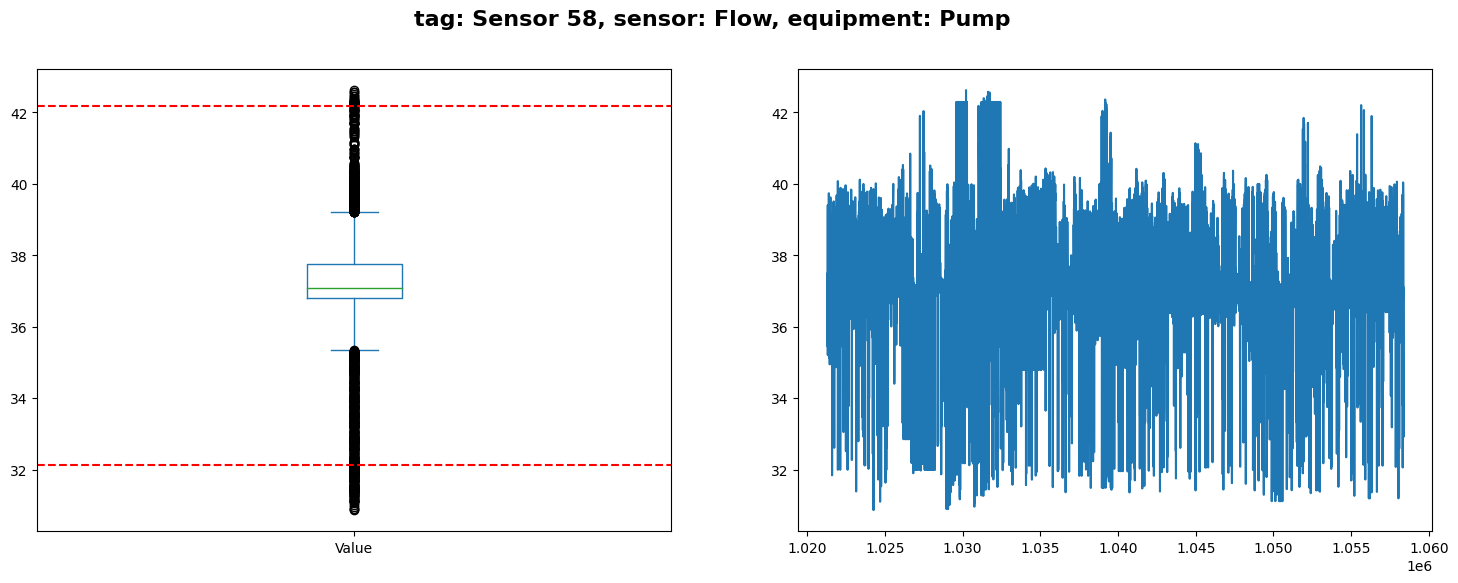

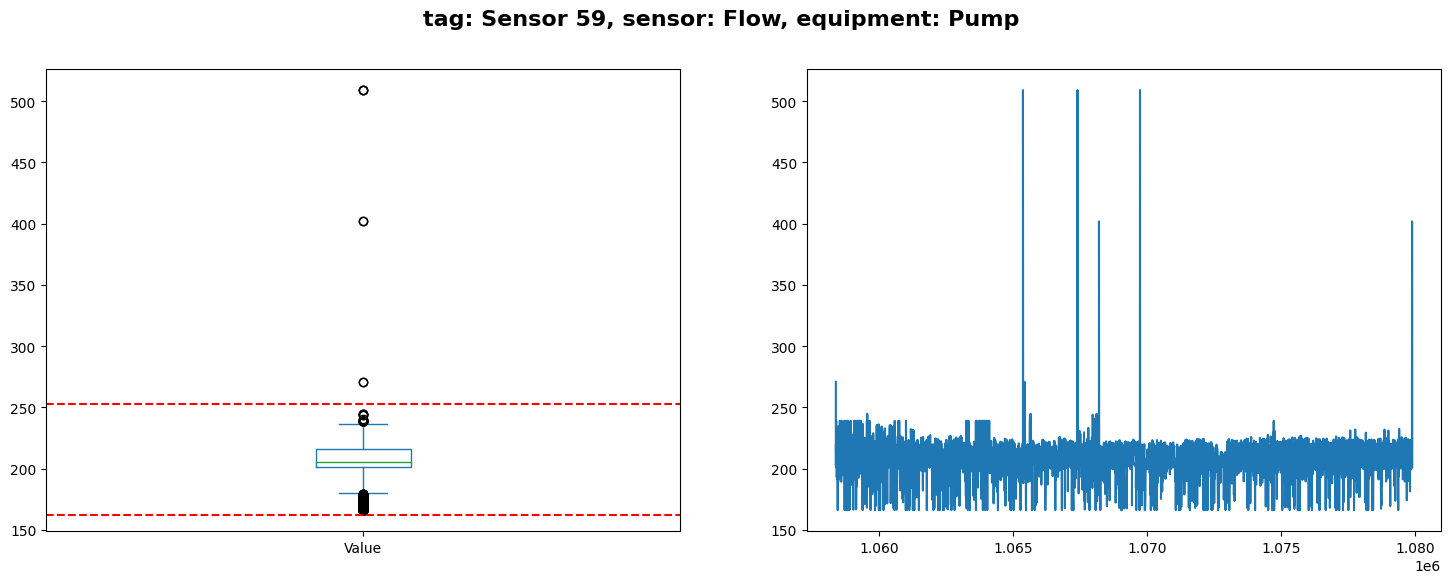

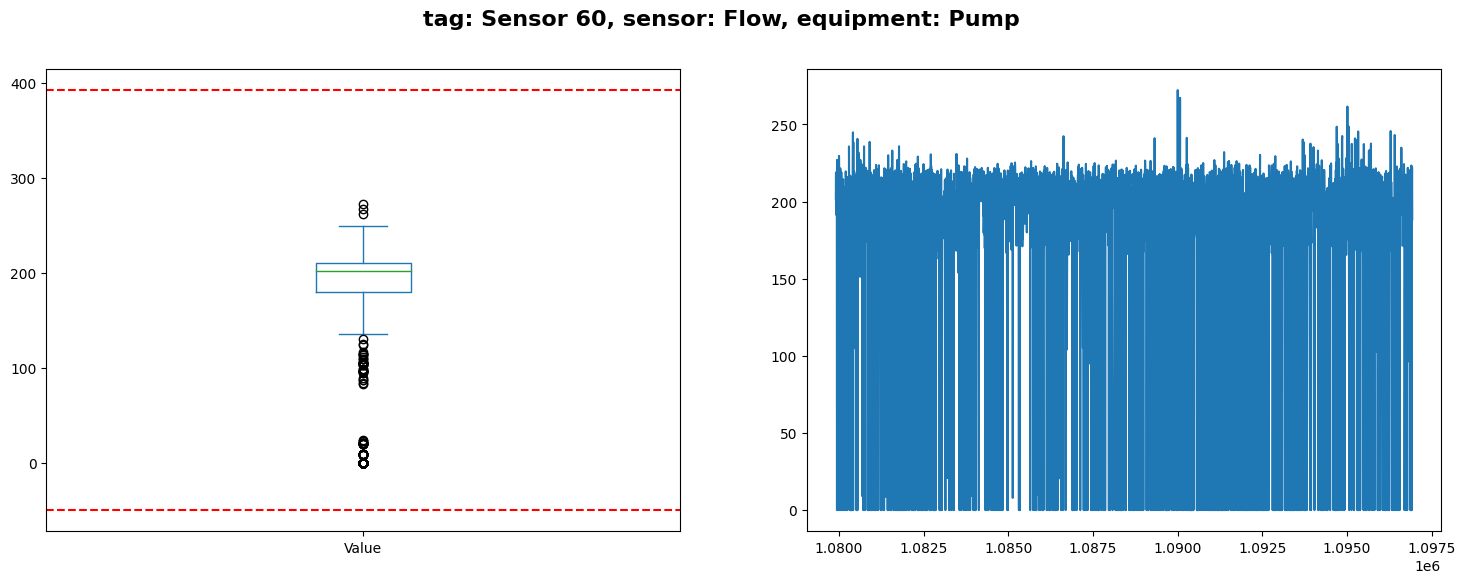

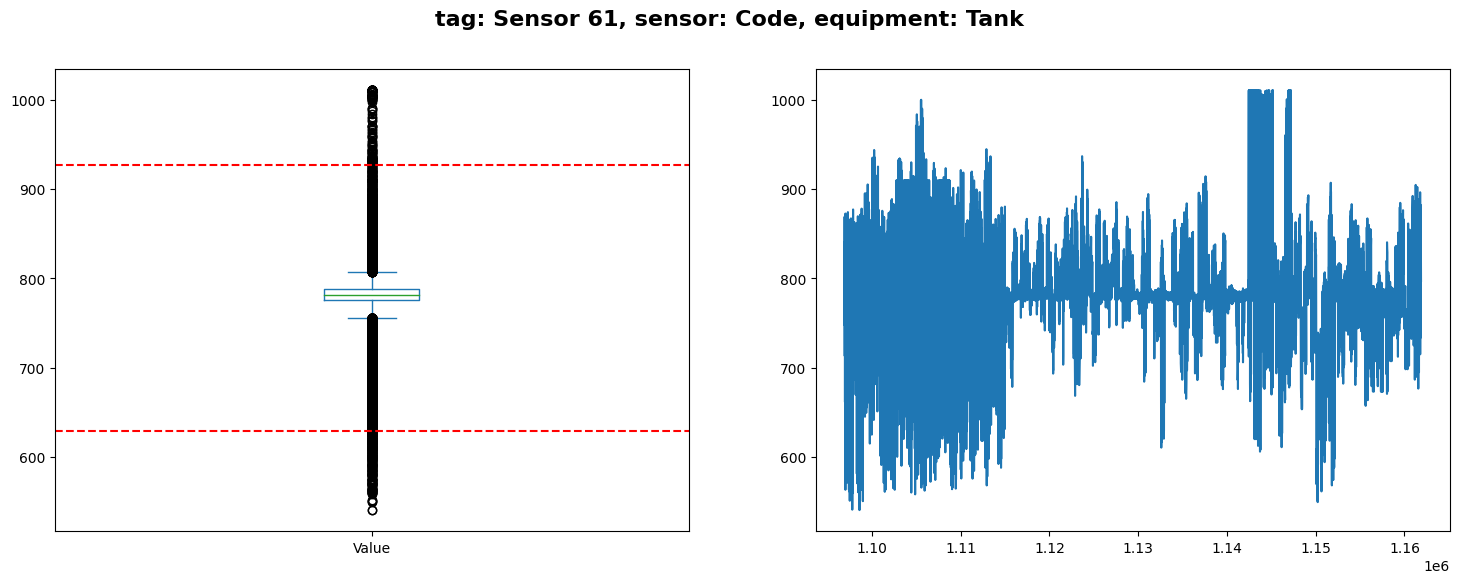

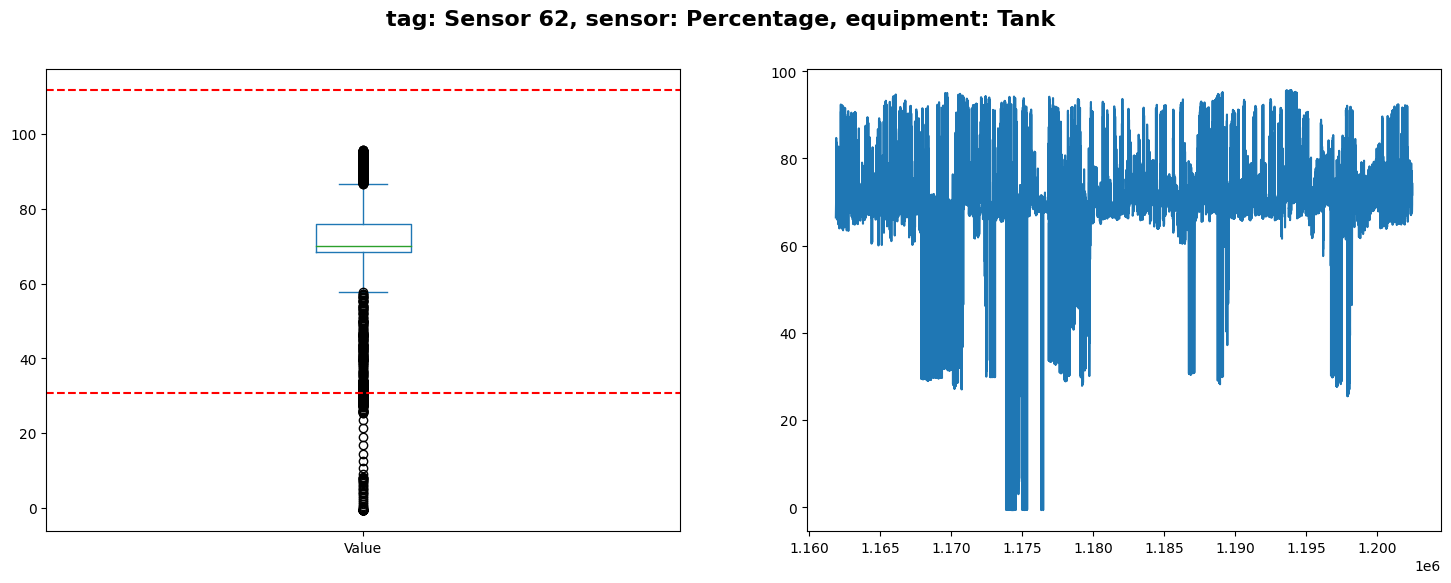

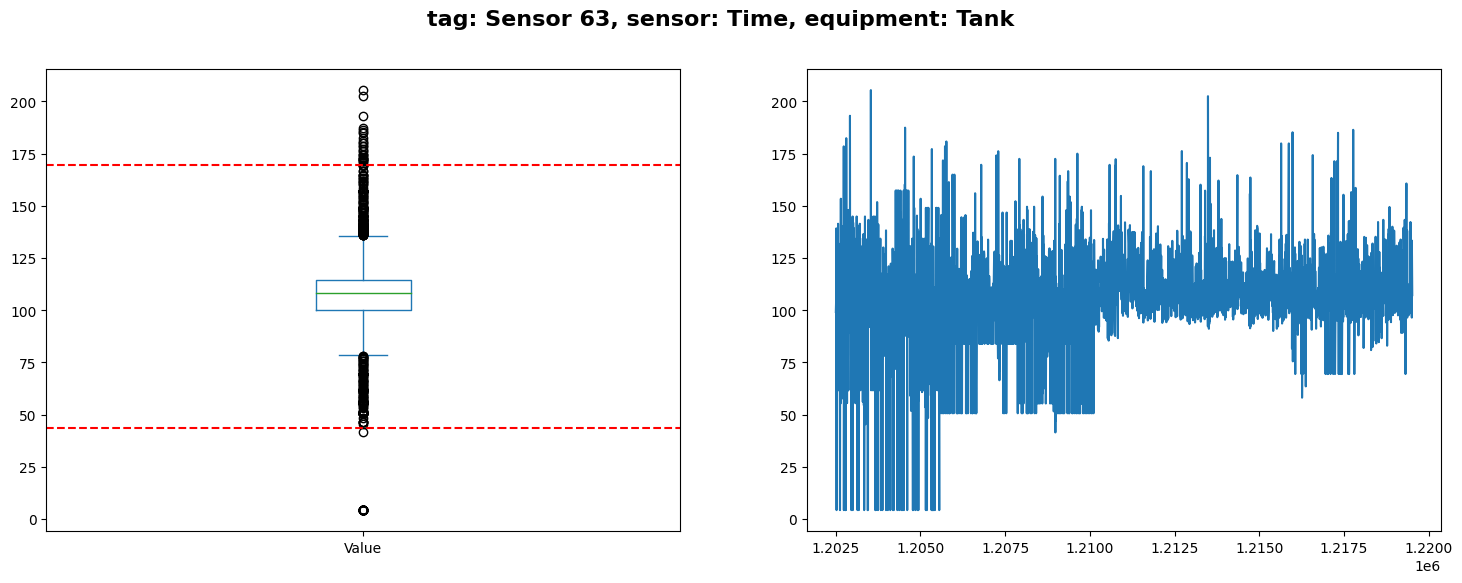

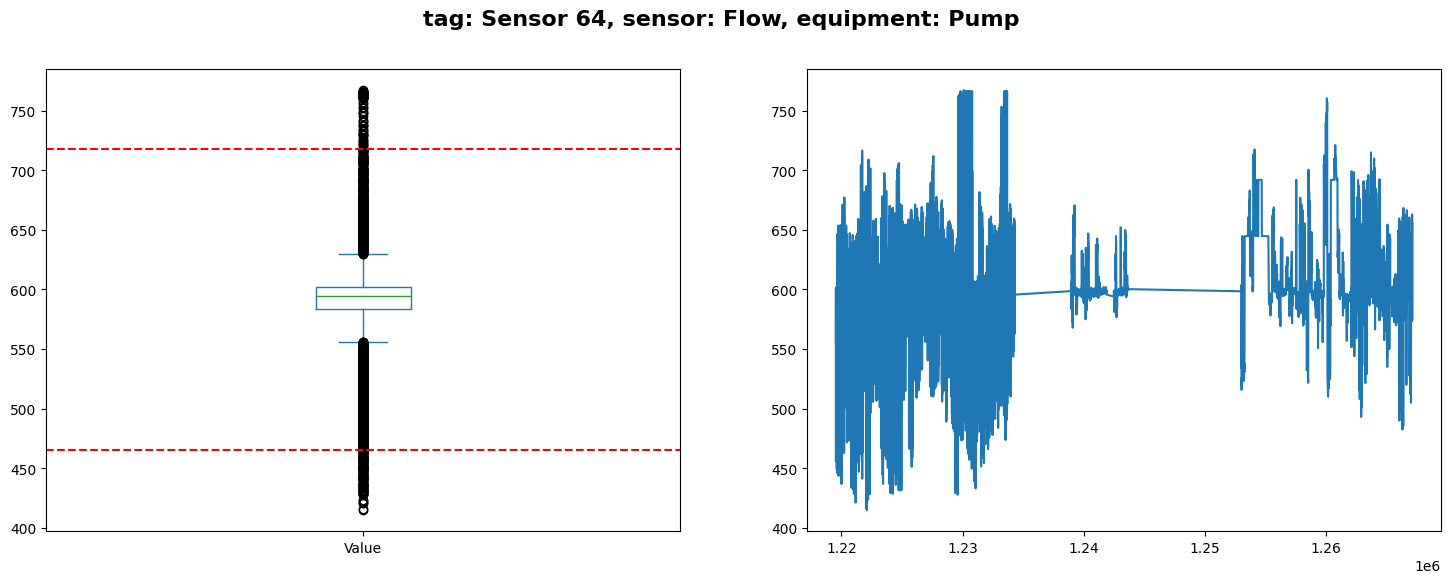

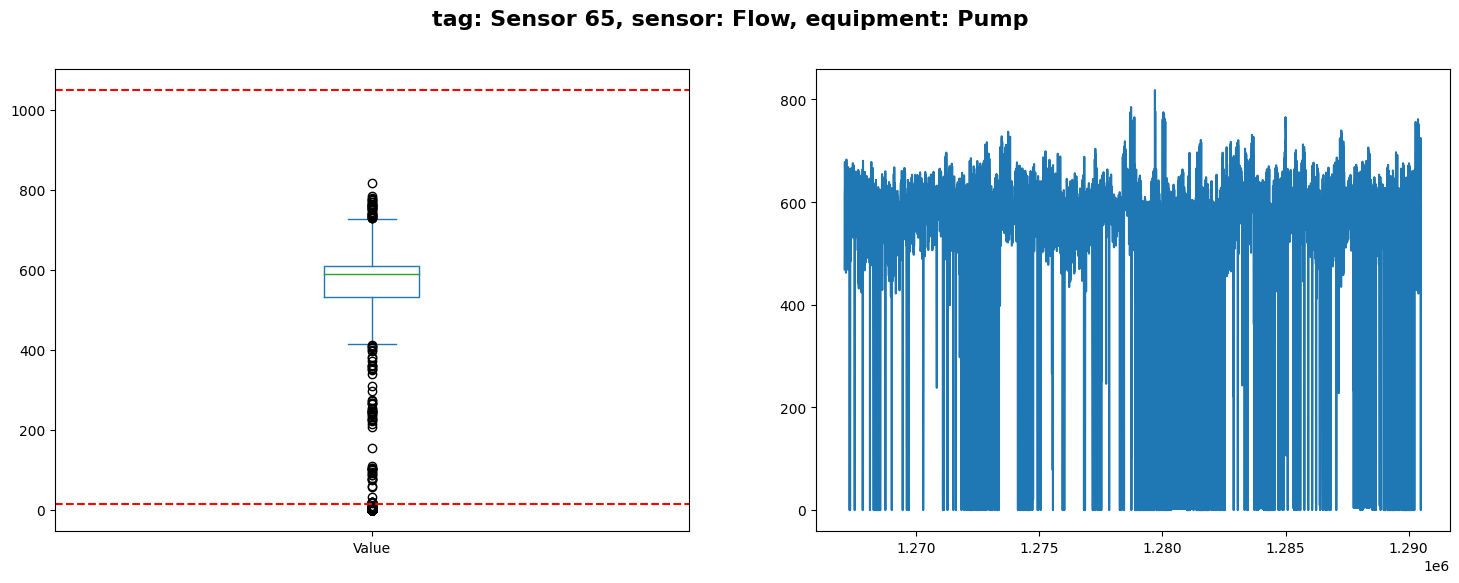

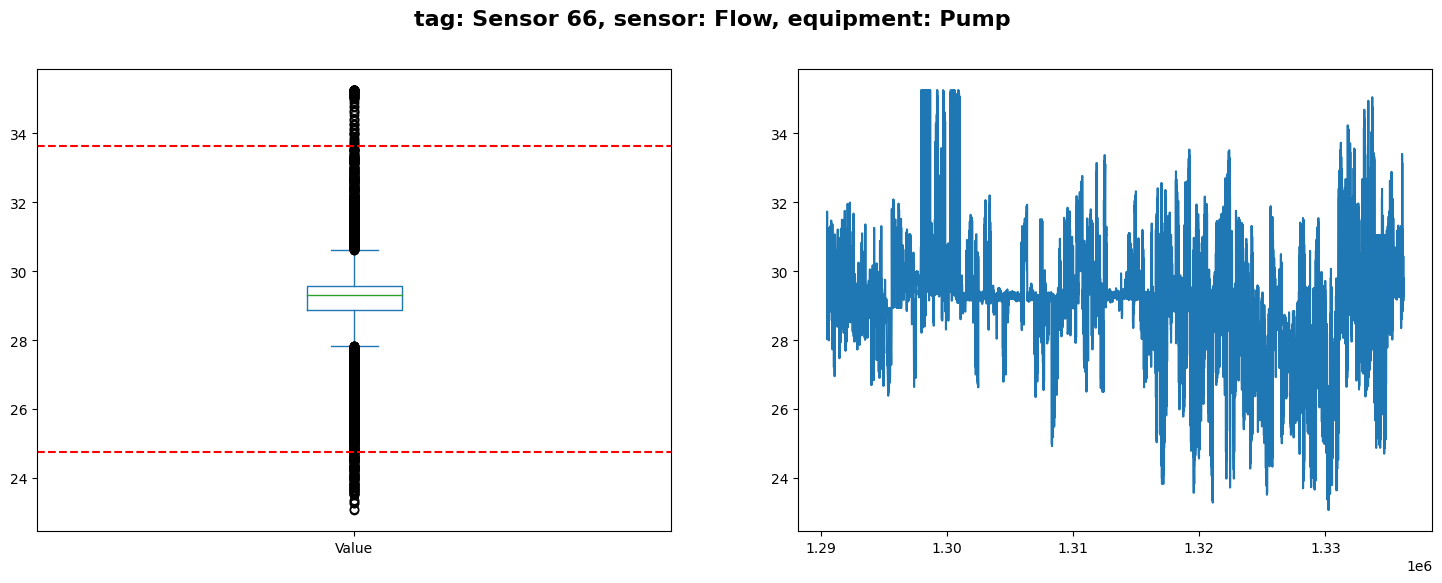

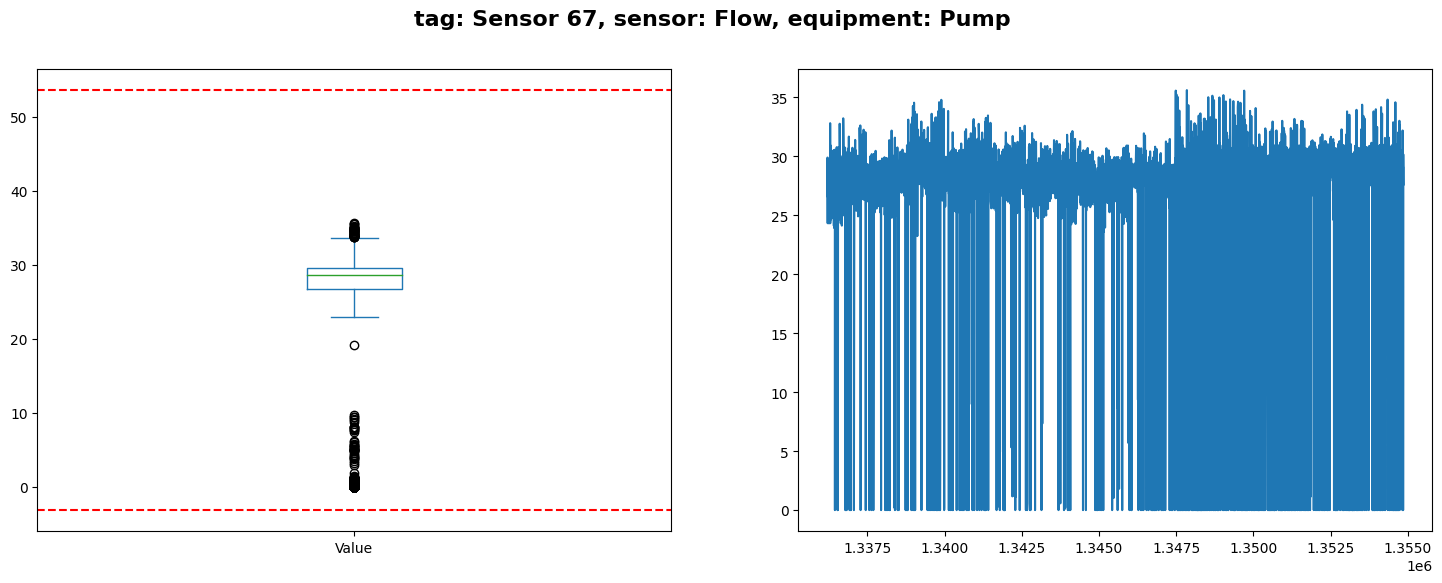

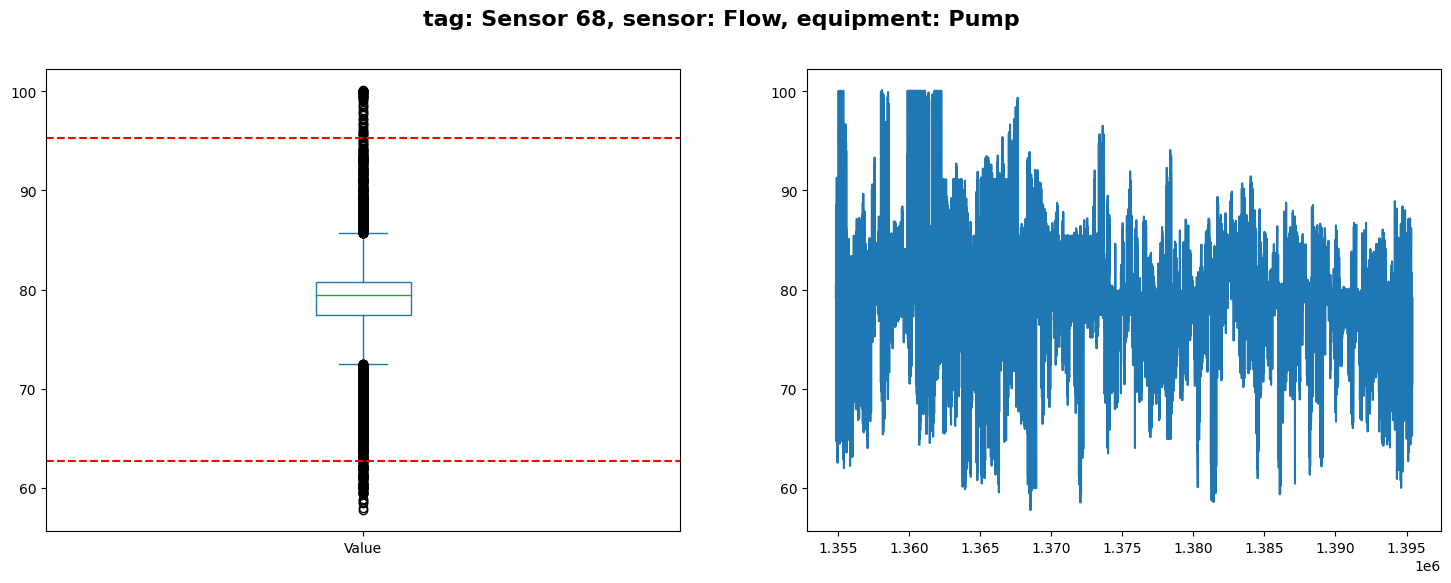

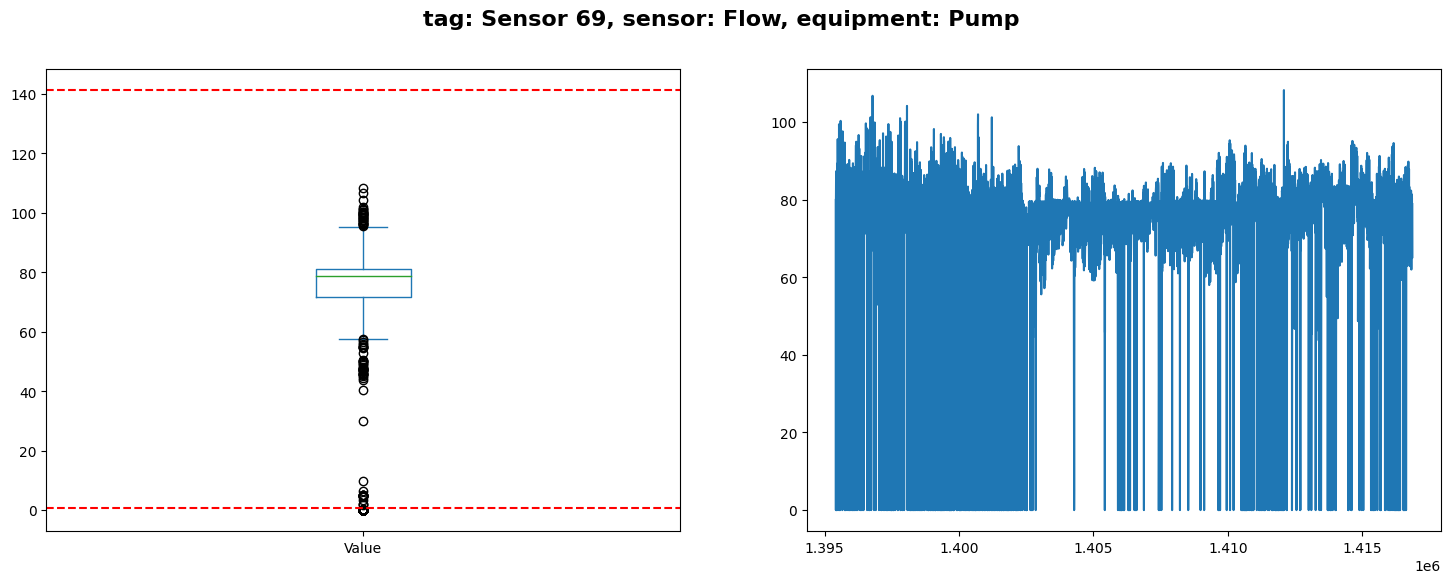

In [15]:
tags = df_anon_high_res["Tag"].unique()

for tag in tags:
    subset = df_anon_high_res[(df_anon_high_res.Tag == tag)]
    subset = subset.loc[(subset["TS"] >= "2022-01-24 08:00:00") & (subset["TS"] <= "2022-01-25 18:00:00")]

    sensor_type = subset["Sensor Type"].iloc[0]
    equipment_type = subset["Equipment Type"].iloc[0]

    title = f"tag: {tag}, sensor: {sensor_type}, equipment: {equipment_type}"

    plot_numerical_descriptives(subset["TS"], subset["Value"], title)

**Categorical values (overal)**

In [16]:
print(pd.DataFrame({
    "Tag": tags,
    "Sensor Type": [df_anon_high_res[(df_anon_high_res.Tag == tag)]["Sensor Type"].iloc[0] for tag in tags],
    "Equipment Type": [df_anon_high_res[(df_anon_high_res.Tag == tag)]["Equipment Type"].iloc[0] for tag in tags],
}).to_string())

          Tag  Sensor Type Equipment Type
0    Sensor 1         Flow           Pump
1    Sensor 2         Flow           Pump
2    Sensor 3      Product        Product
3    Sensor 4      Product        Product
4    Sensor 5      Product        Product
5    Sensor 6      Product        Product
6    Sensor 7      Product        Product
7    Sensor 8      Product        Product
8    Sensor 9      Product        Product
9   Sensor 10      Product        Product
10  Sensor 11      Product        Product
11  Sensor 12      Product        Product
12  Sensor 13      Product        Product
13  Sensor 14         Code        Product
14  Sensor 15  Temperature            NaN
15  Sensor 16         Flow           Pump
16  Sensor 17      Current           Pump
17  Sensor 18         Rate           Pump
18  Sensor 19      Current           Pump
19  Sensor 20         Rate           Pump
20  Sensor 21   Percentage           Tank
21  Sensor 22      Current          Mixer
22  Sensor 23    Frequency        

### 1.4.2 Explore combined data segmentation results dataset

In [17]:
# TODO(tomdewildt): explore combined data segmentation results dataset

# 99. Scratch